## Visualización de los mapas de Barcelona:

### Importación de librerías:

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt
import matplotlib.patches as mpatches
import seaborn as sns
import json
from shapely.geometry import Polygon, mapping

### Visualización independiente de cada barrio de Barcelona:

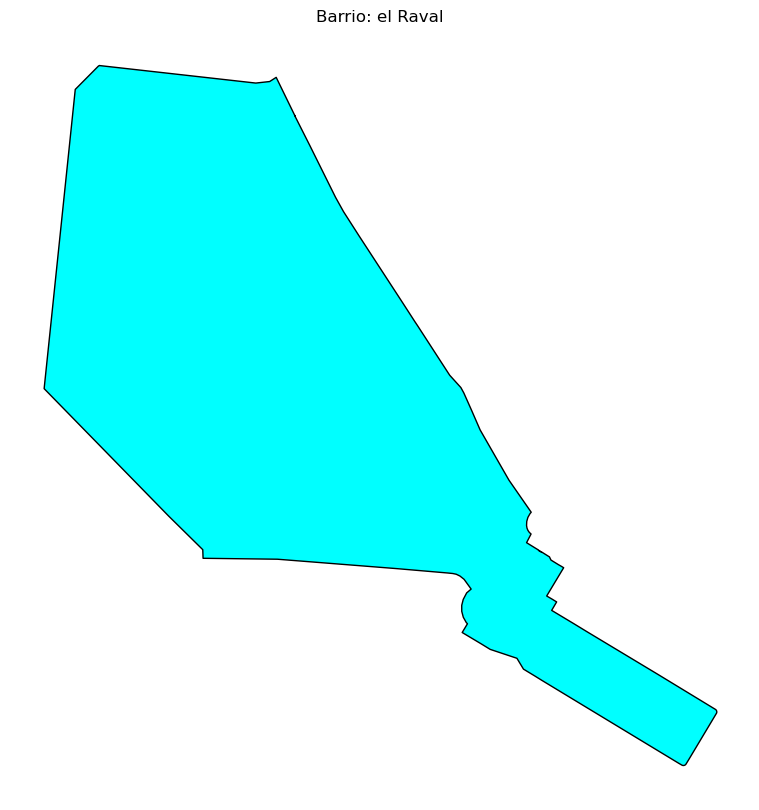

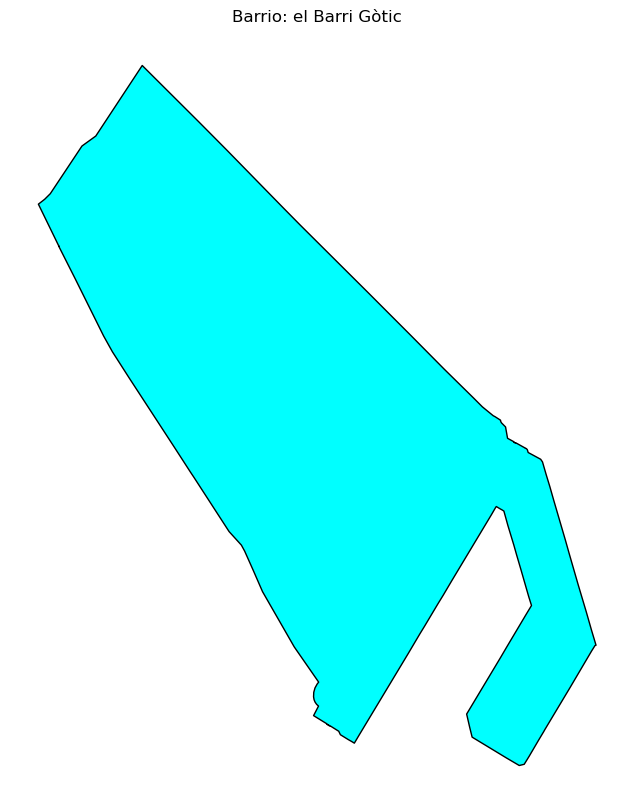

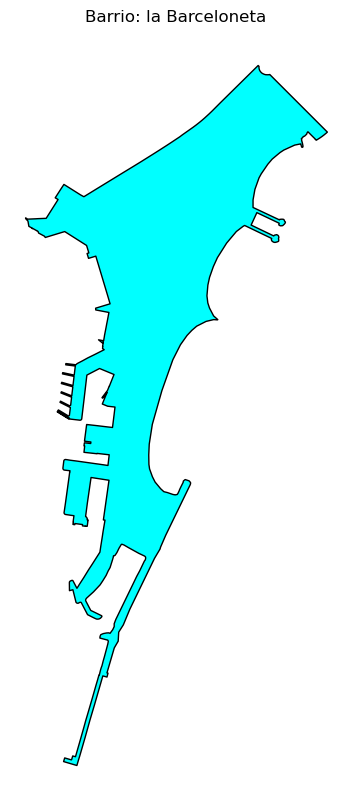

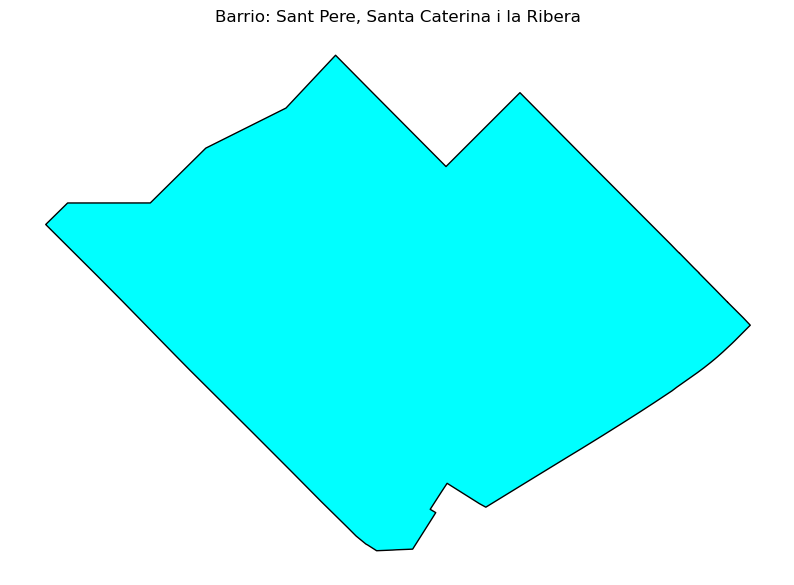

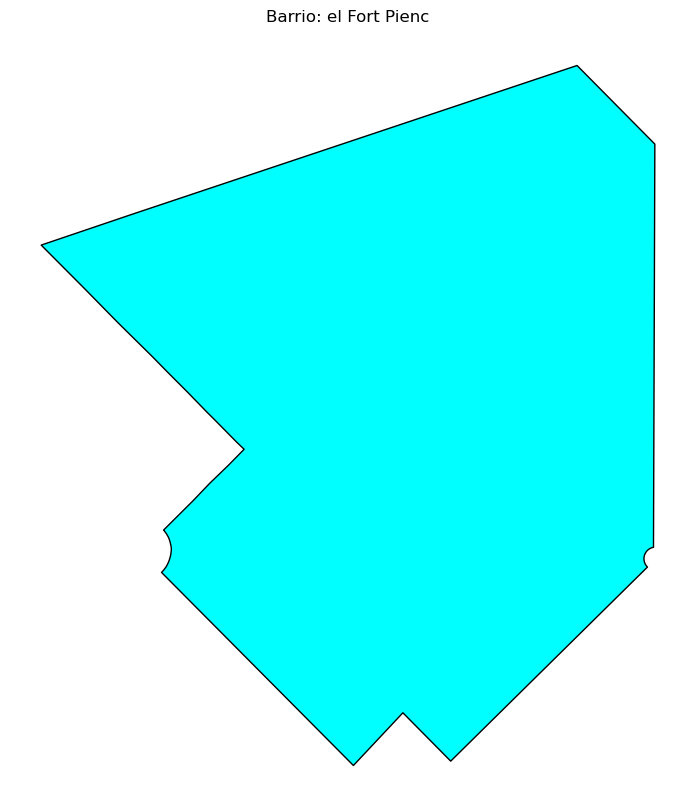

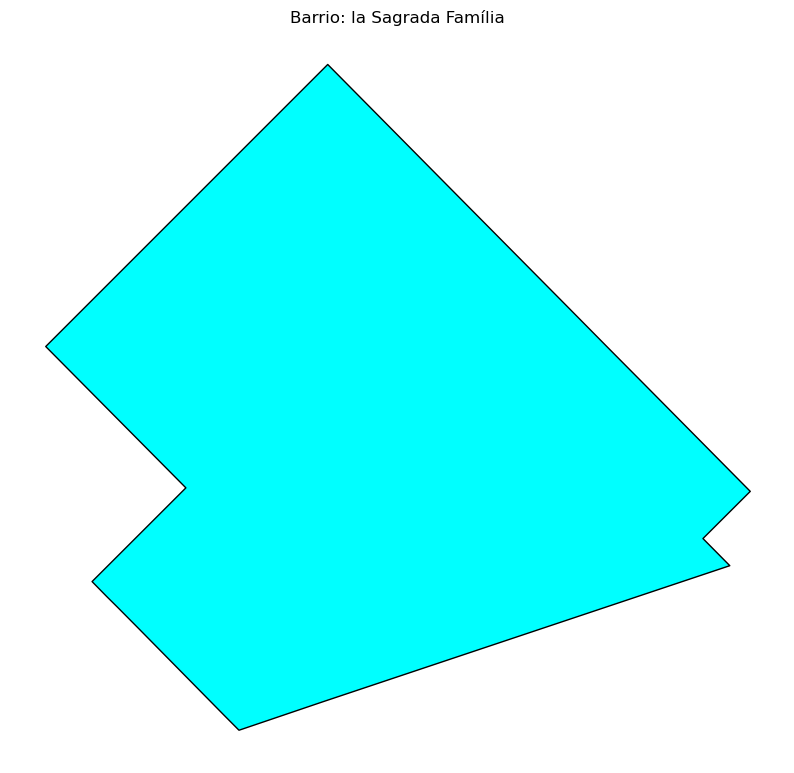

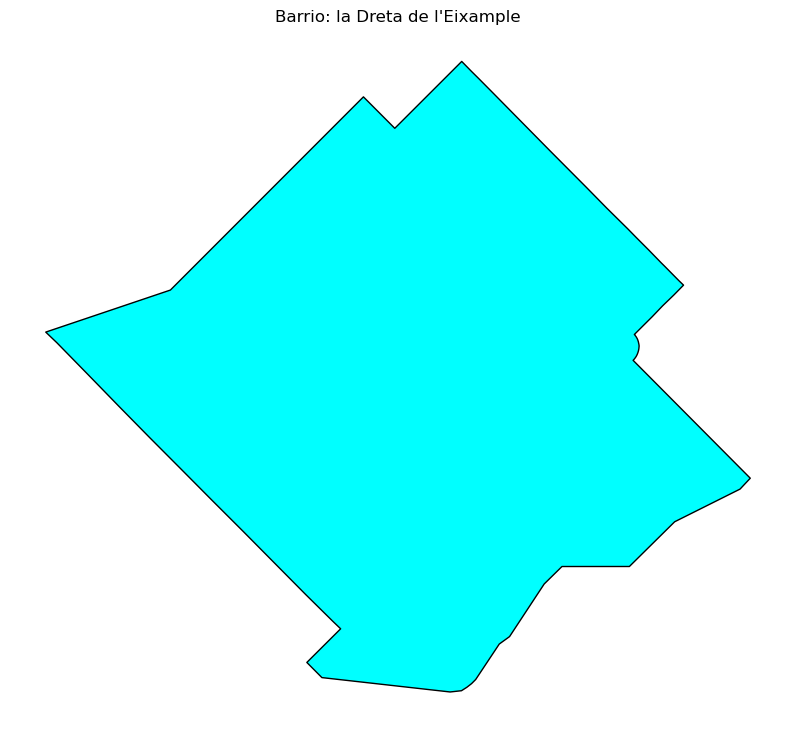

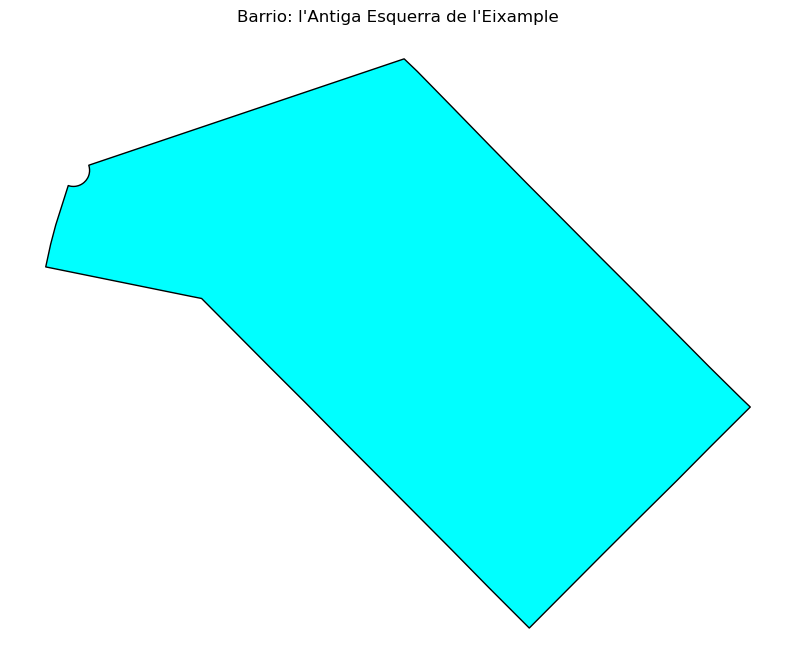

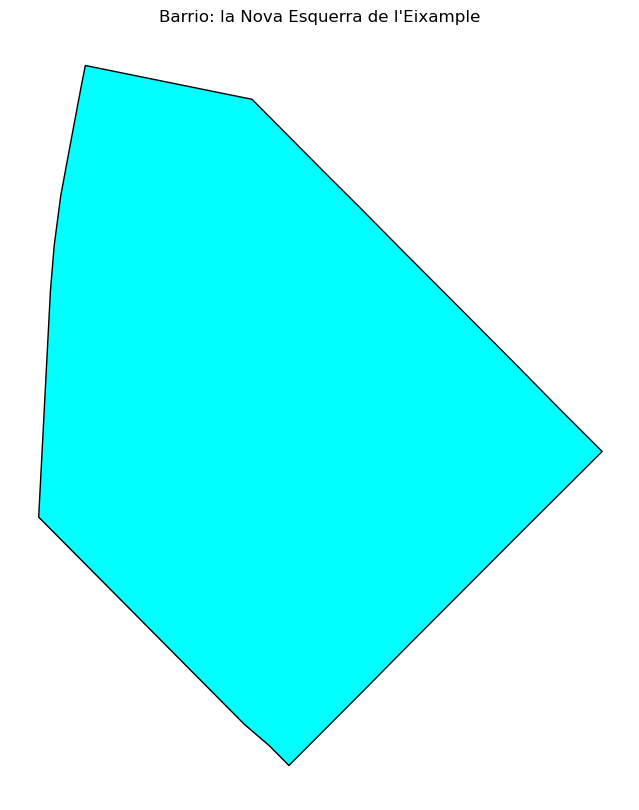

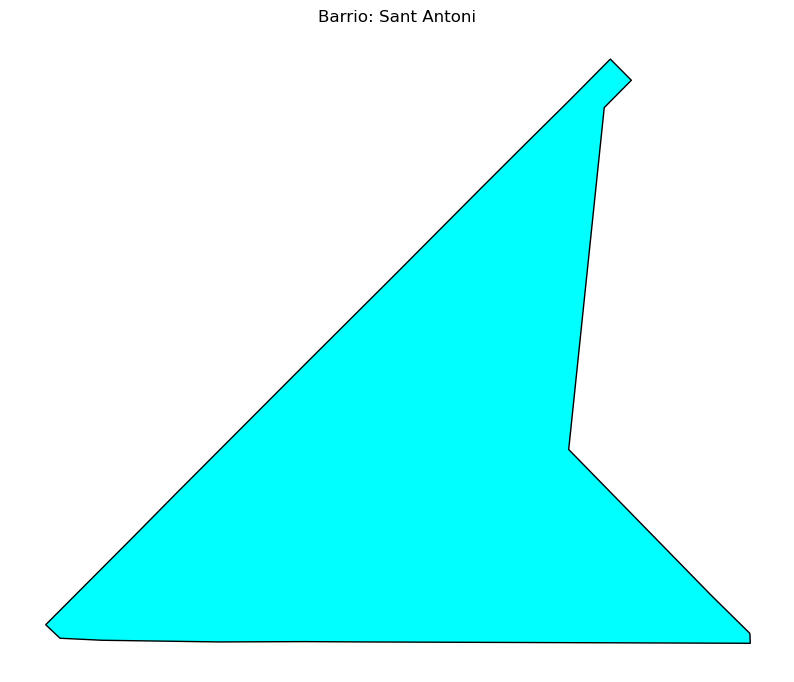

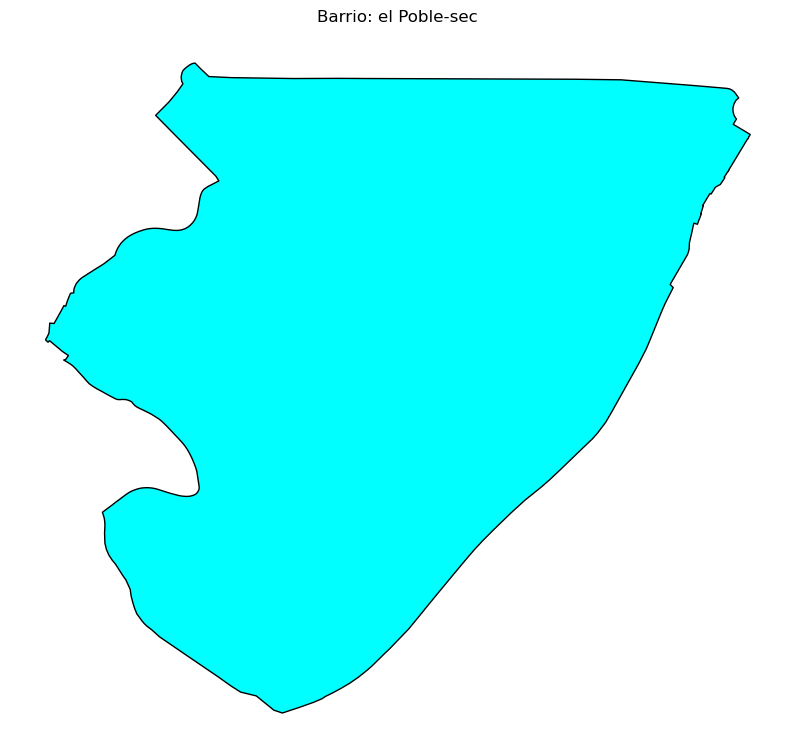

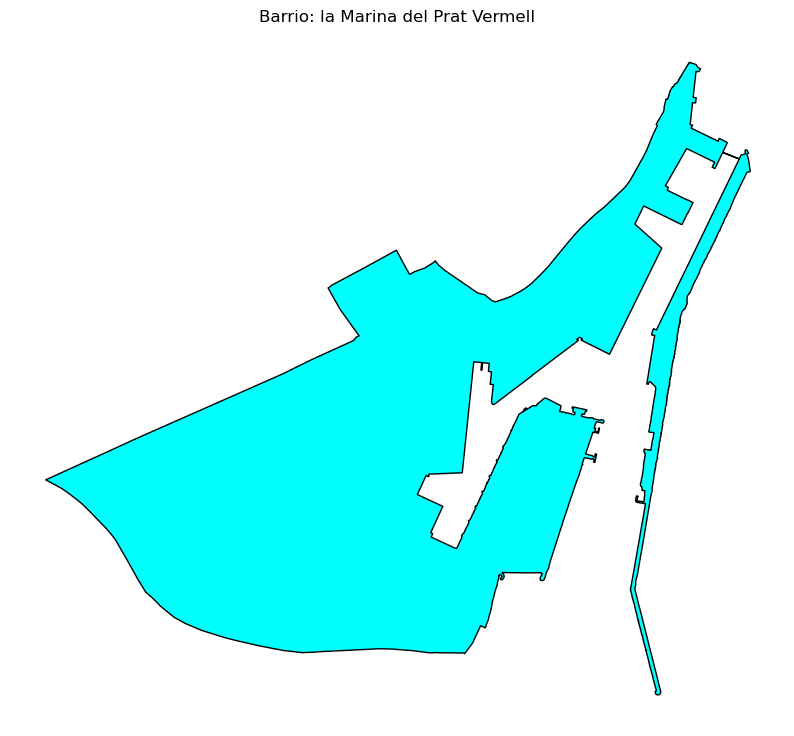

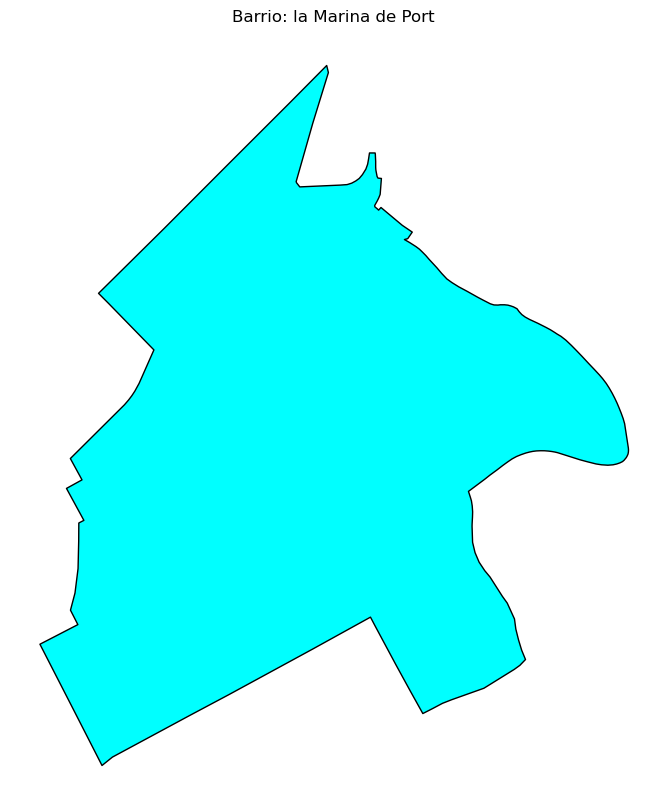

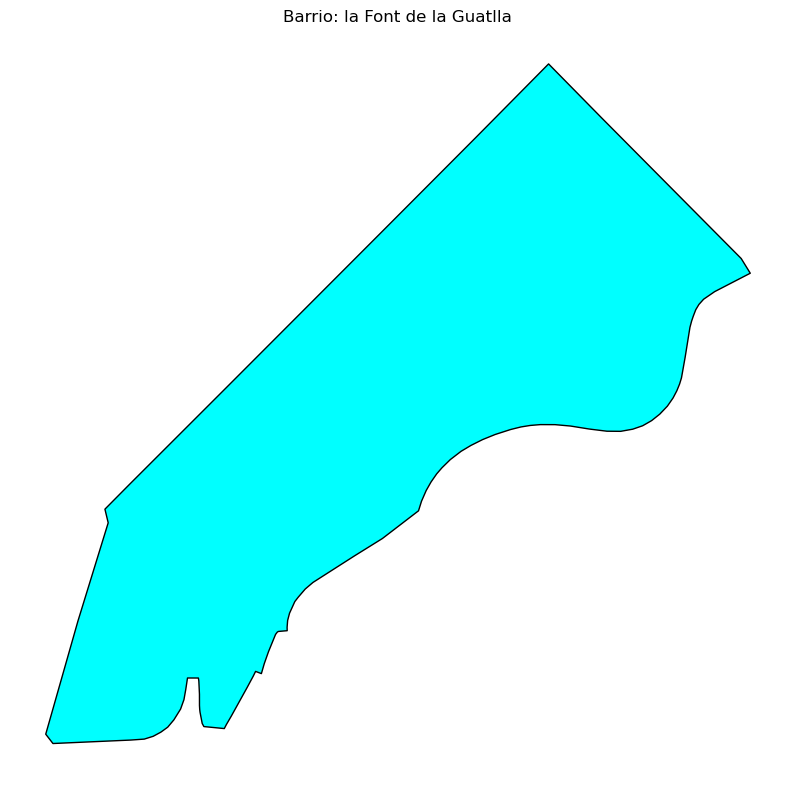

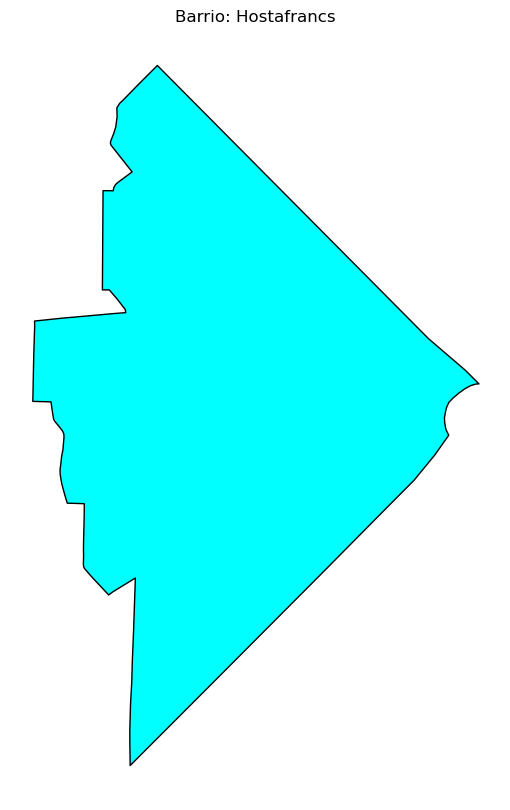

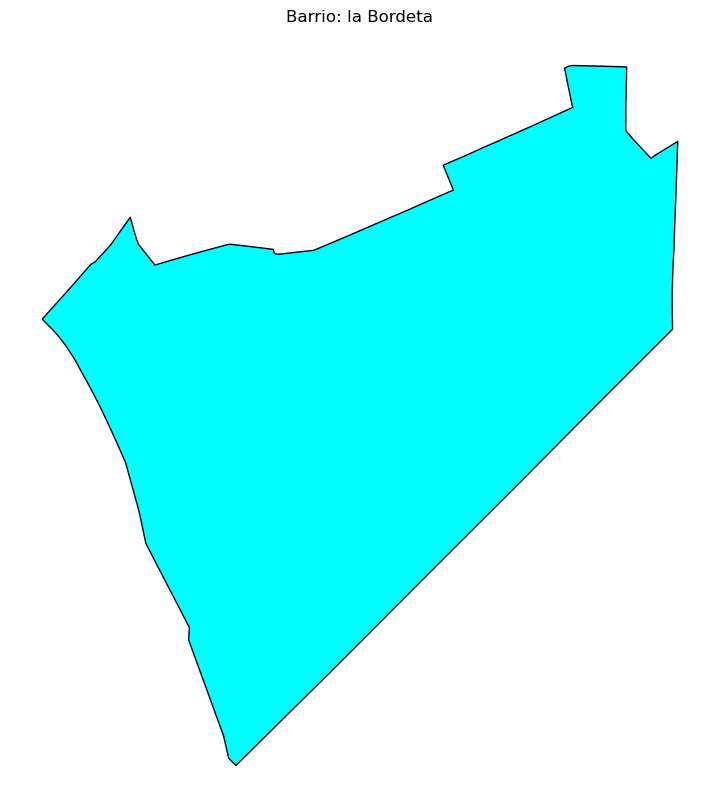

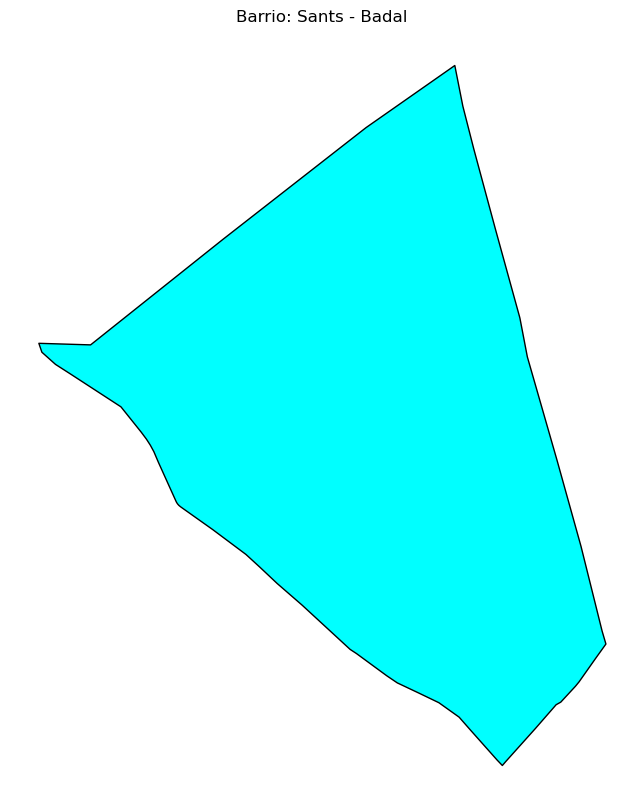

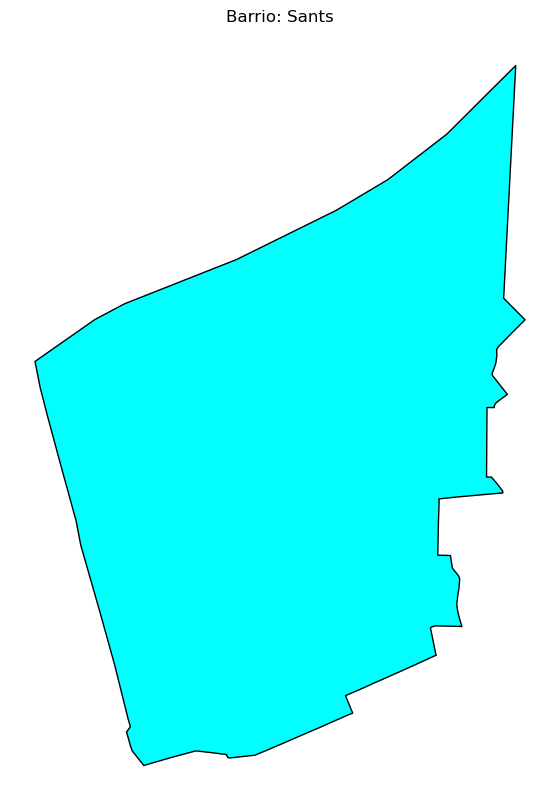

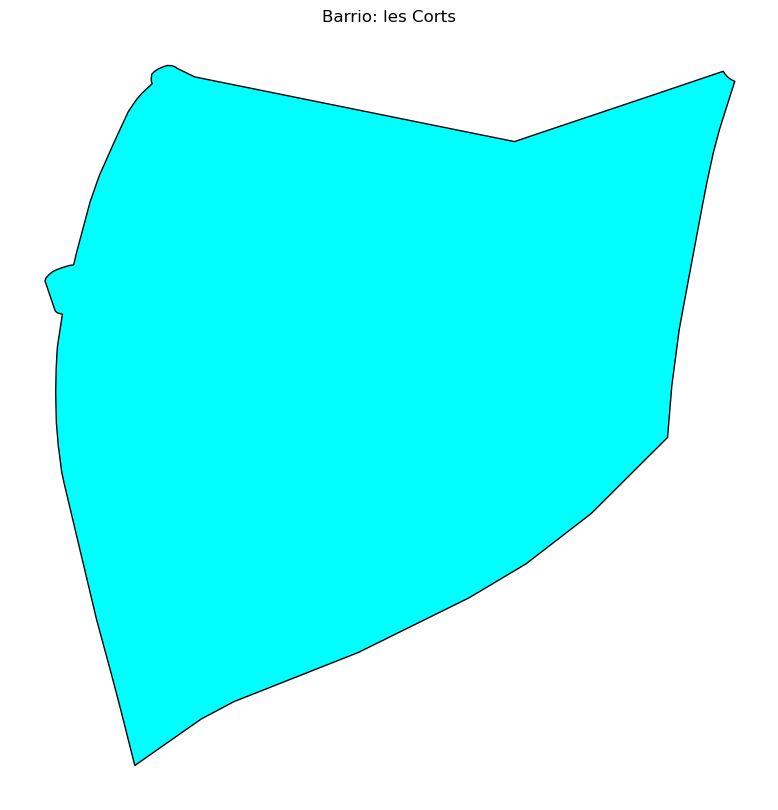

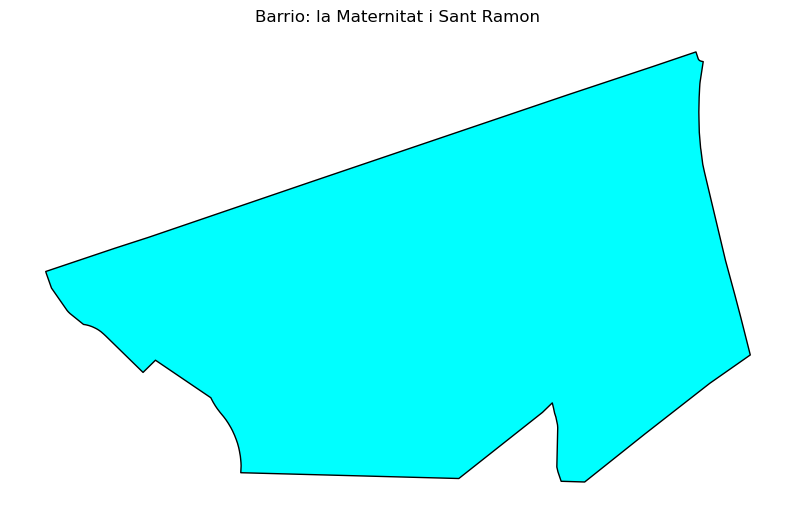

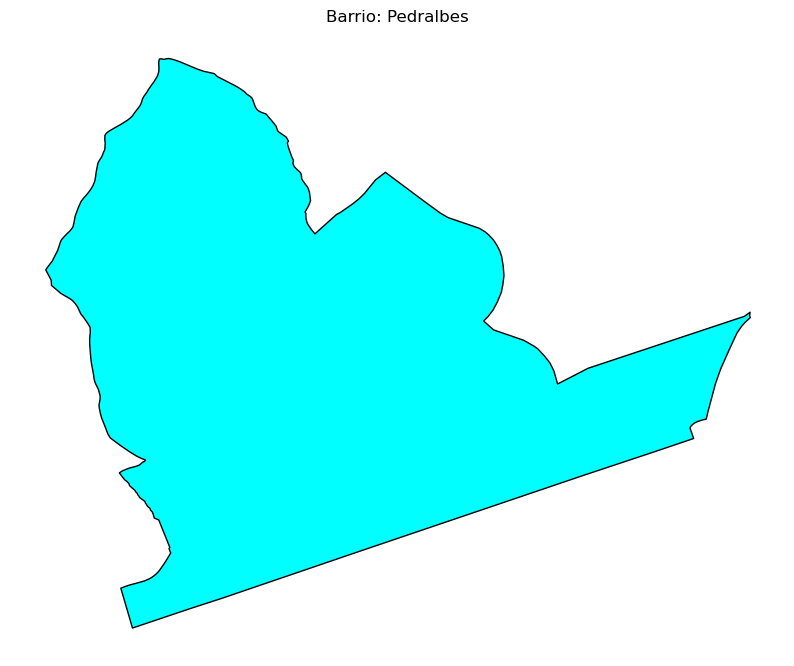

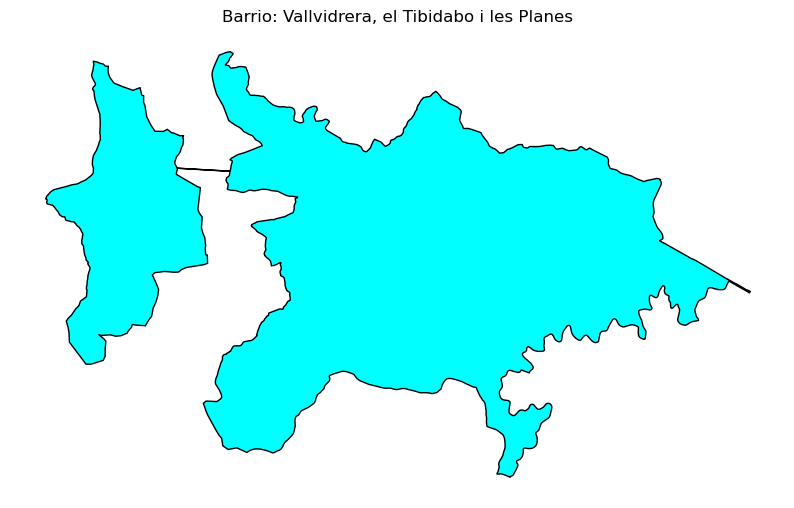

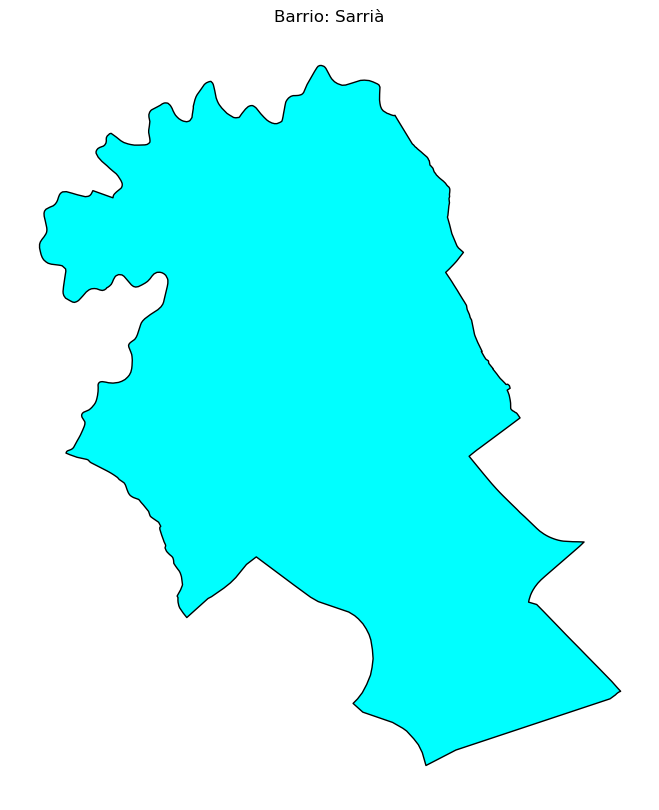

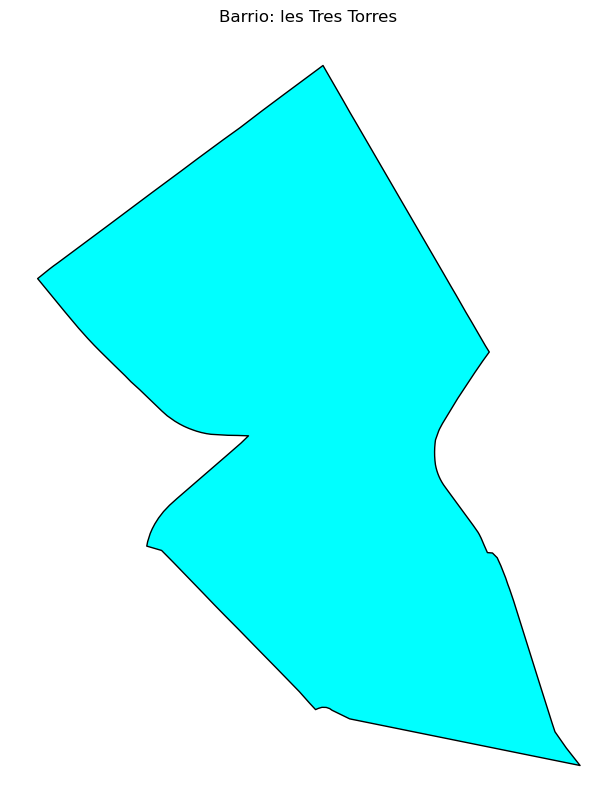

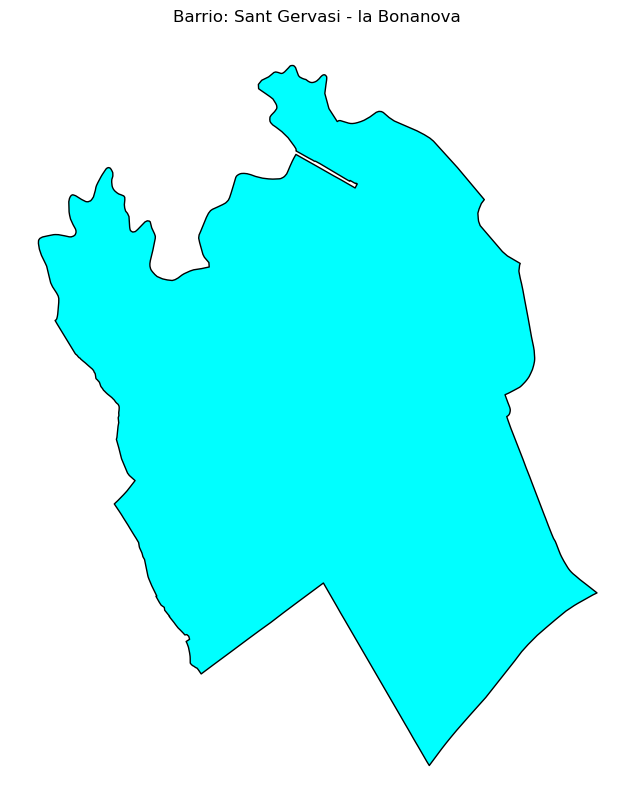

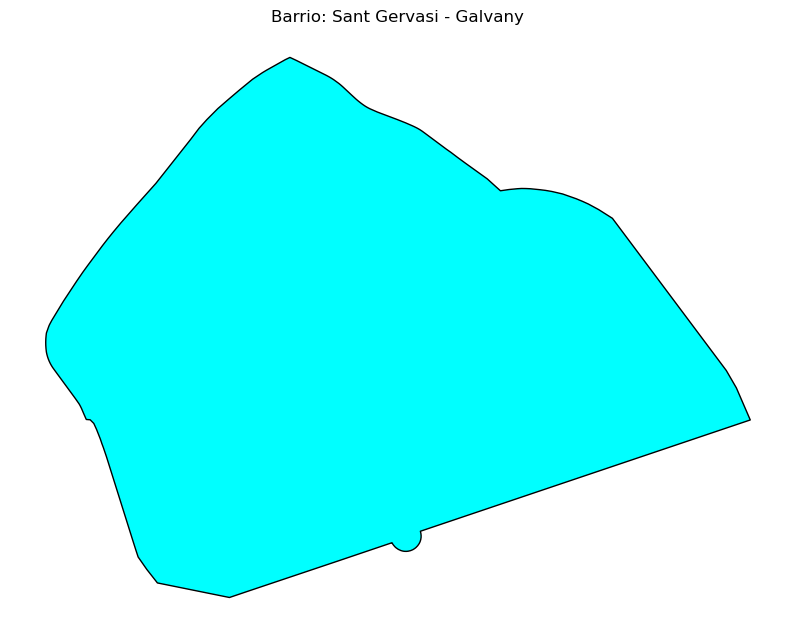

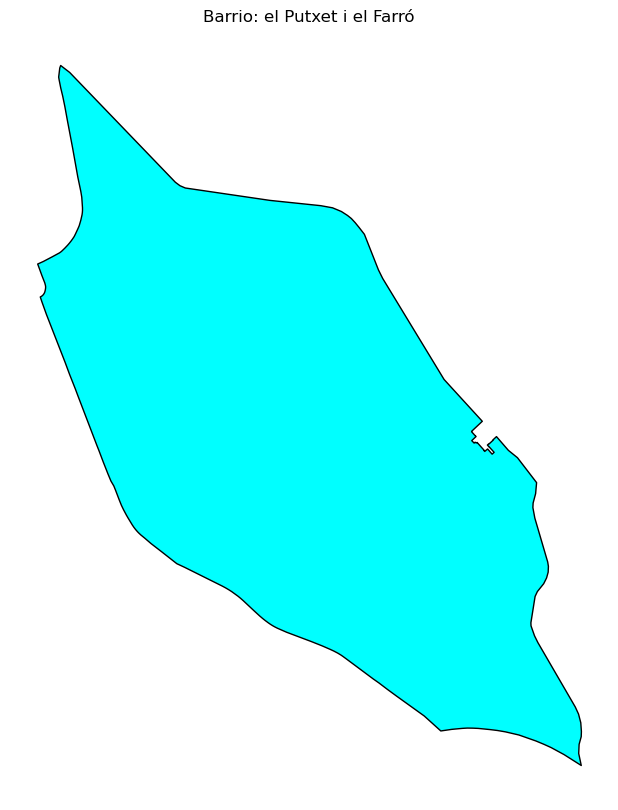

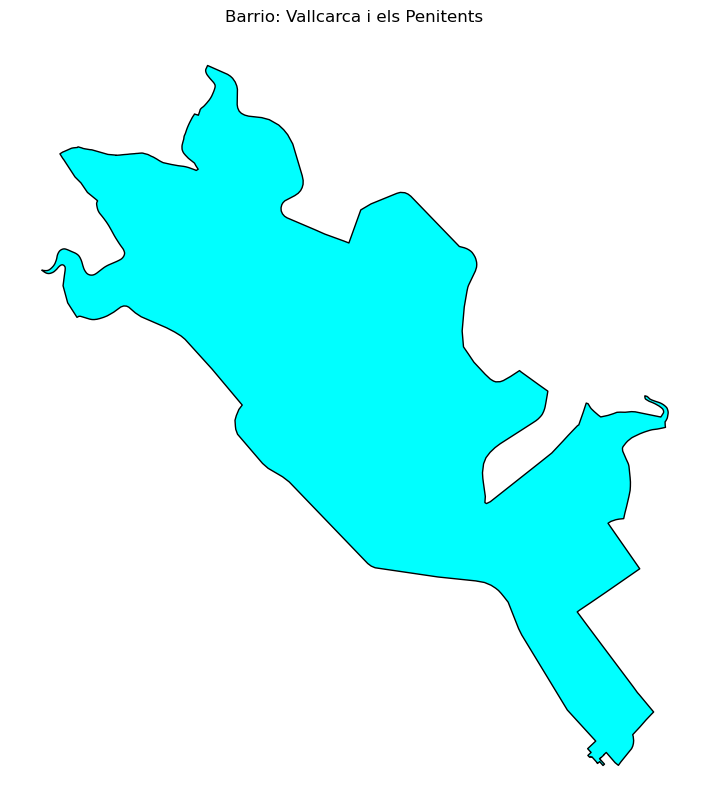

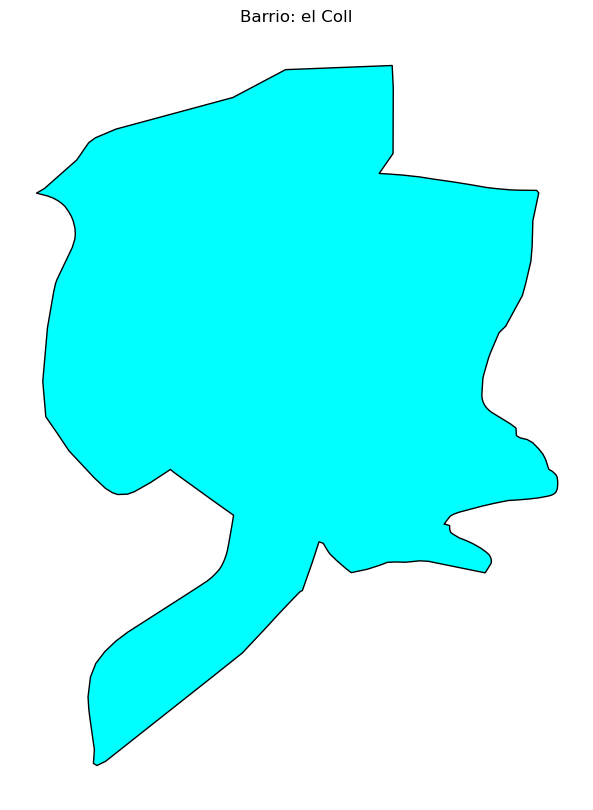

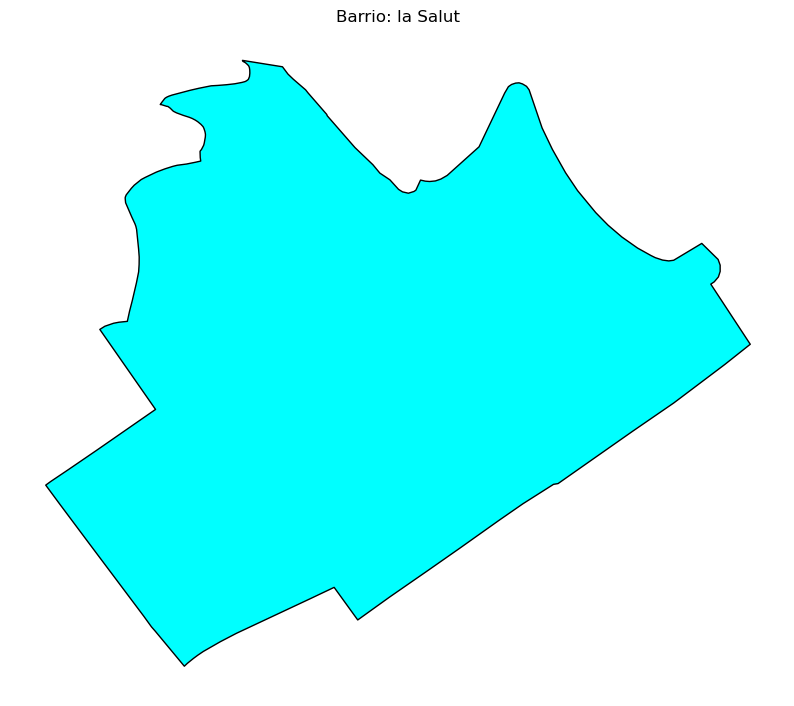

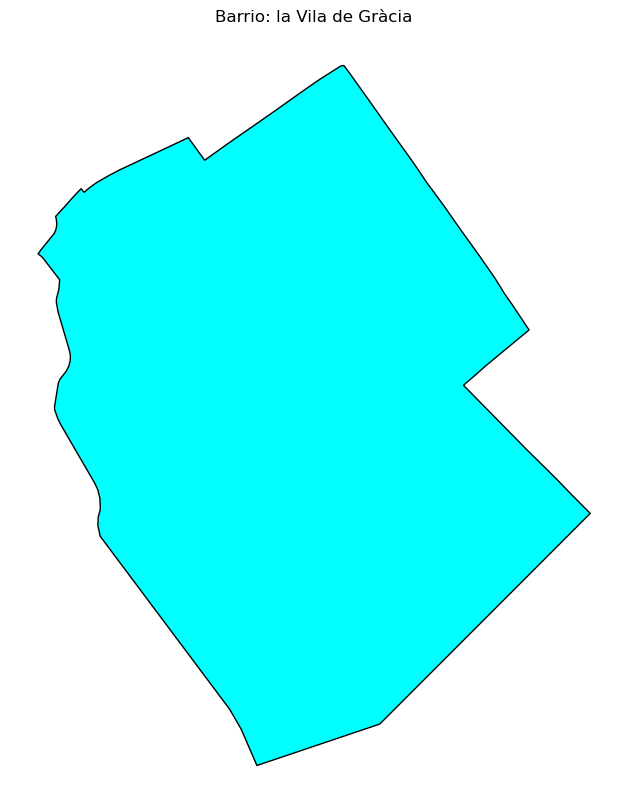

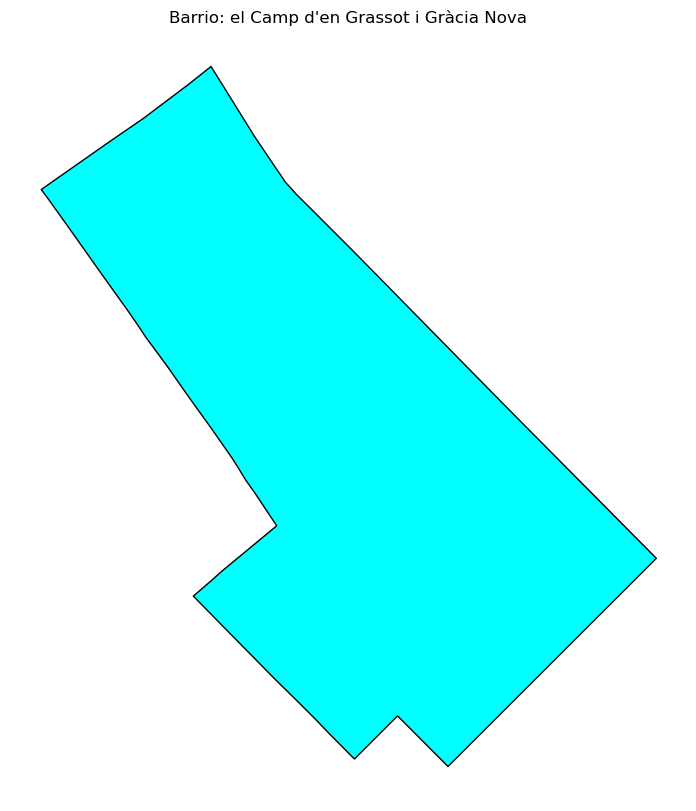

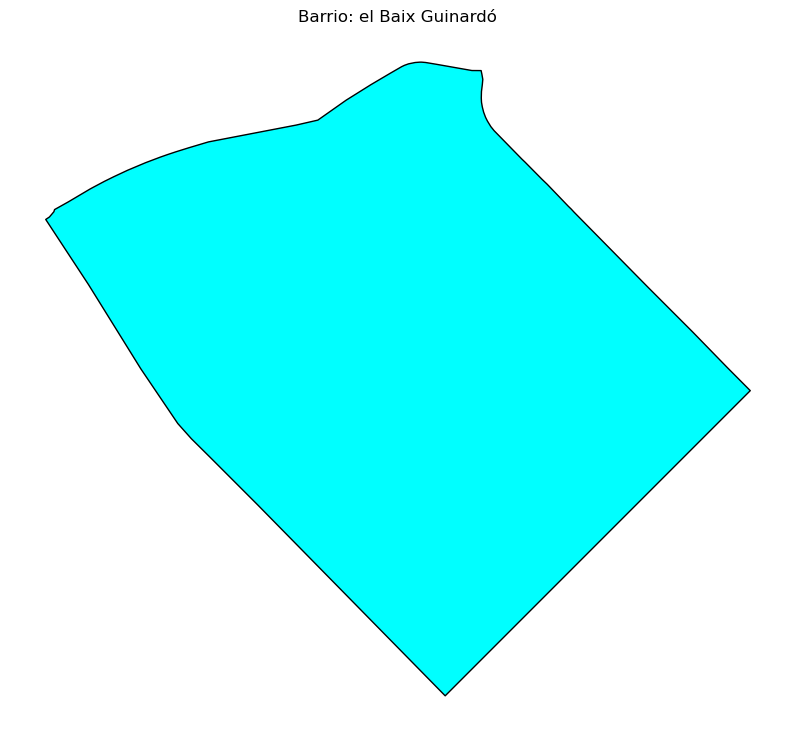

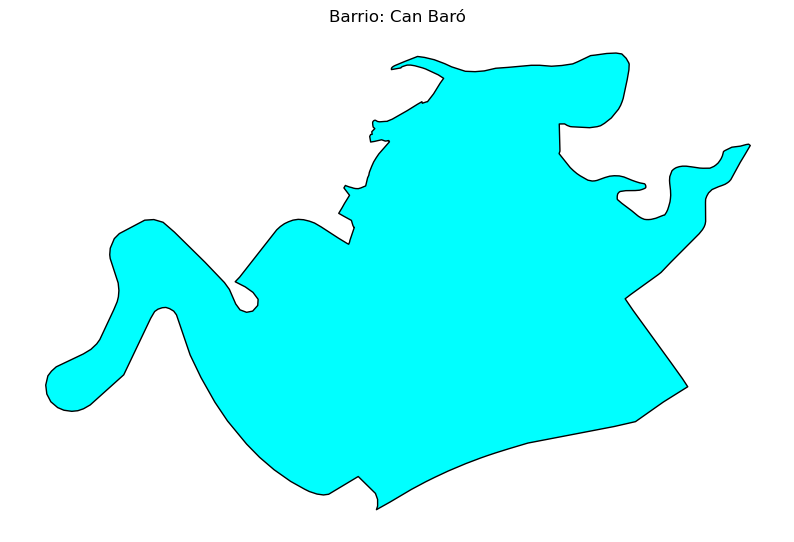

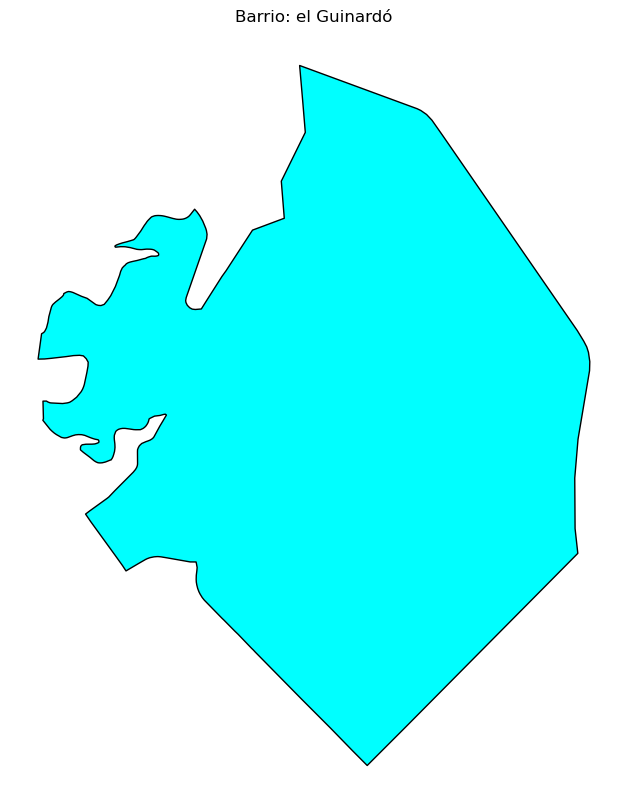

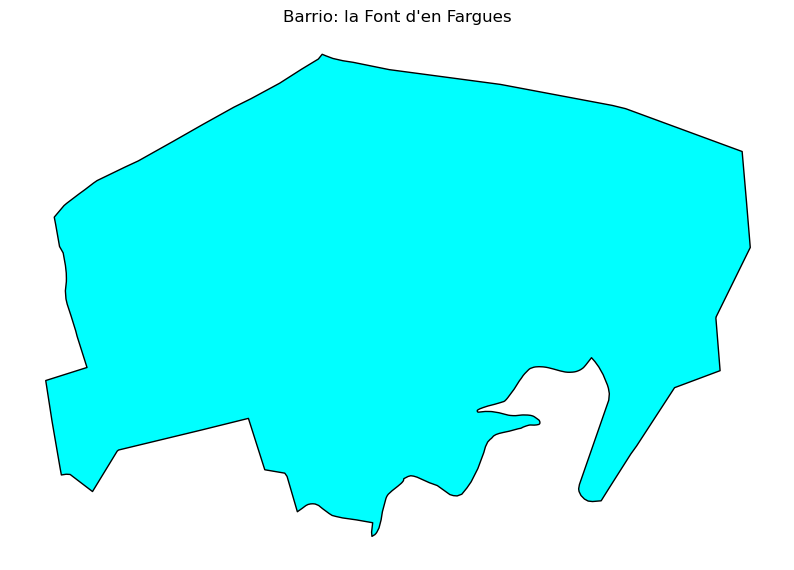

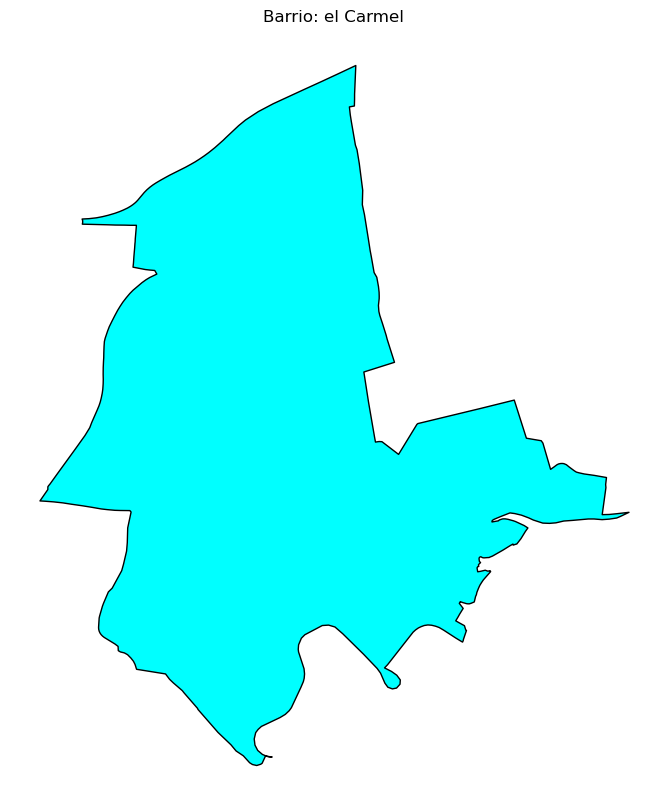

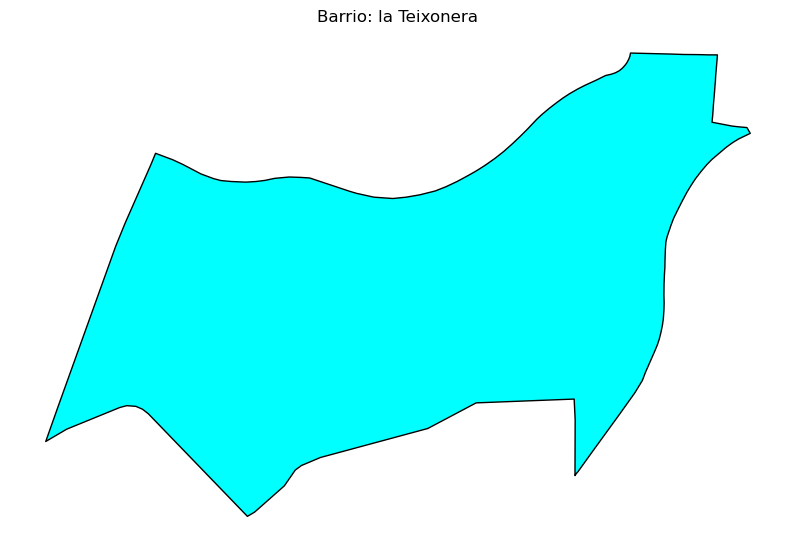

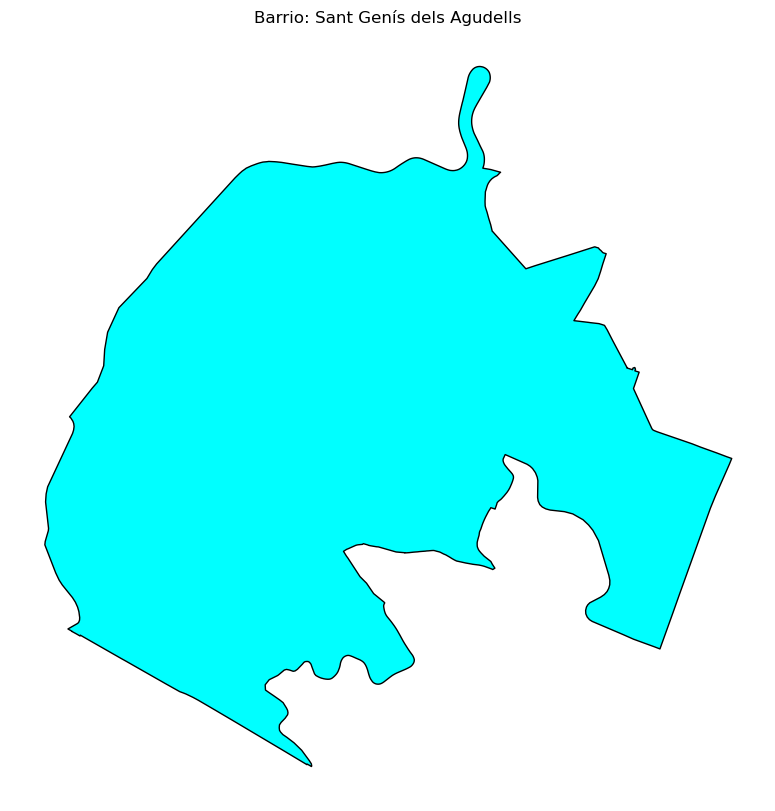

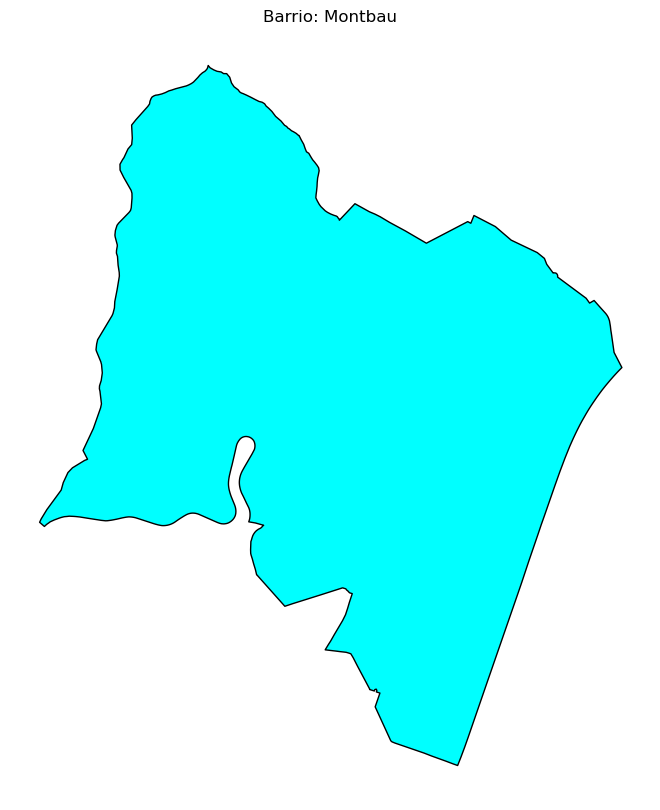

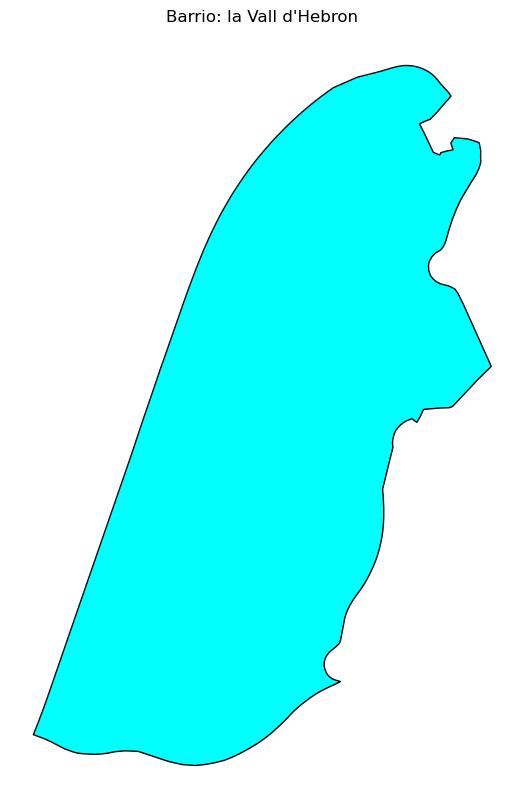

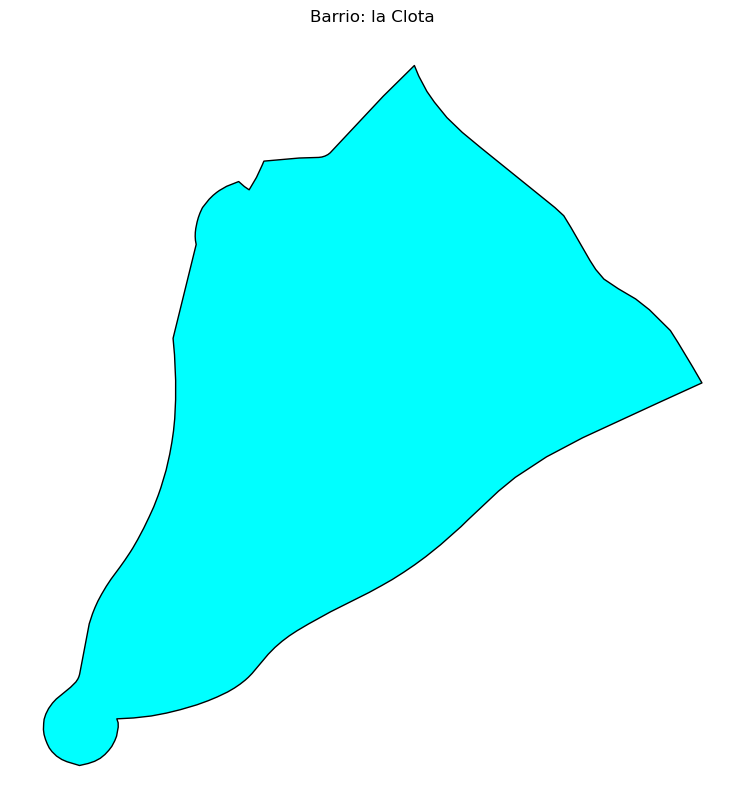

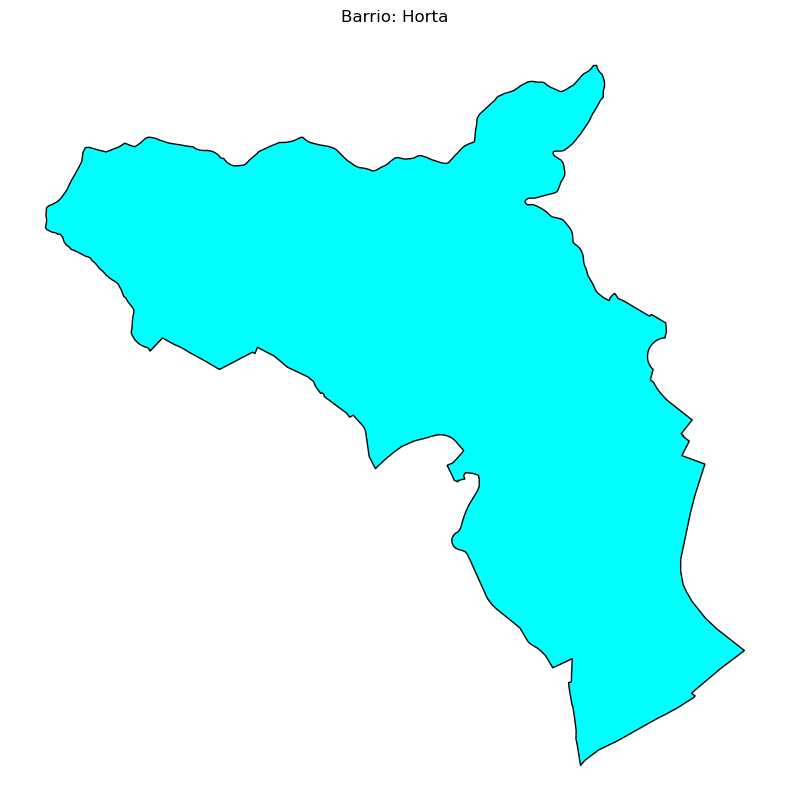

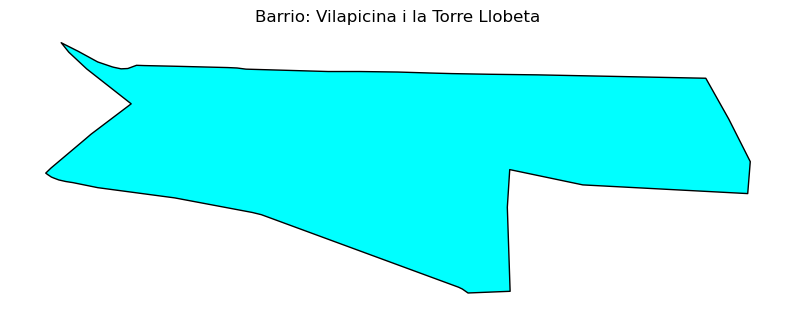

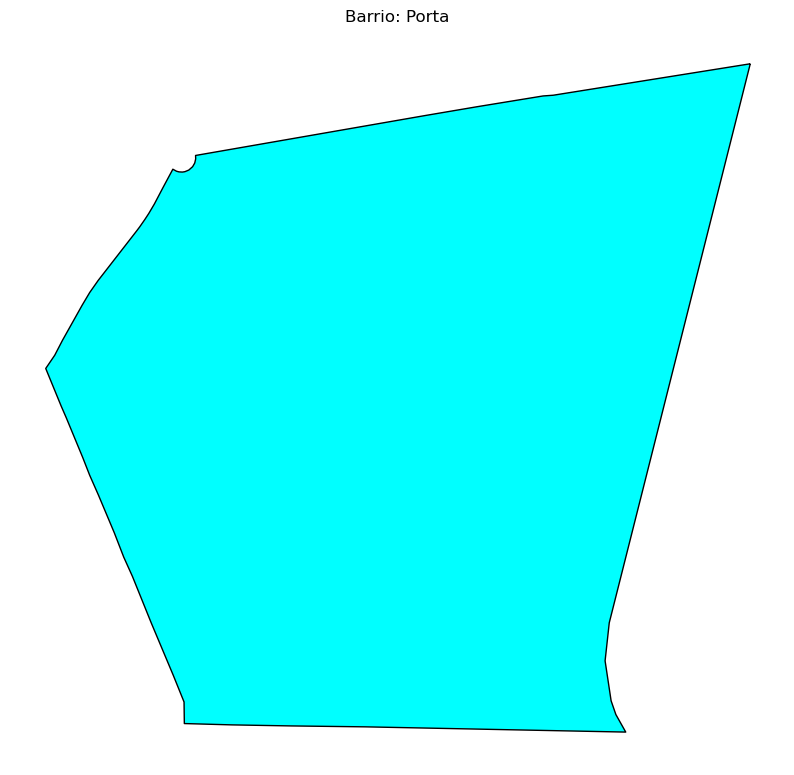

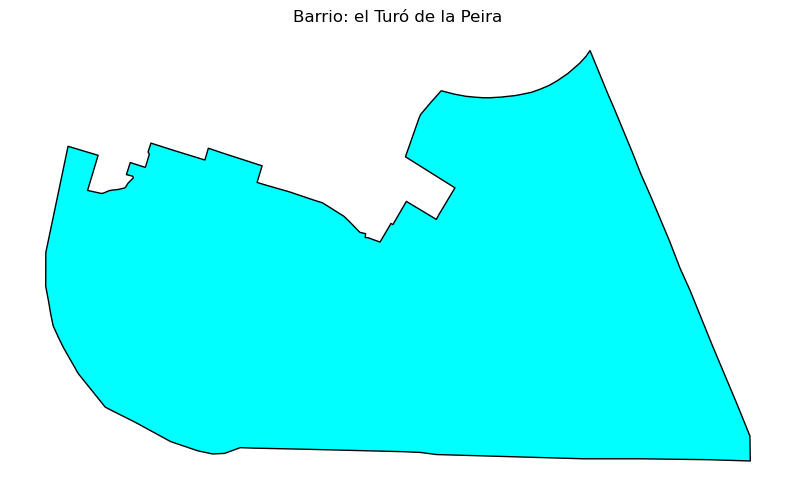

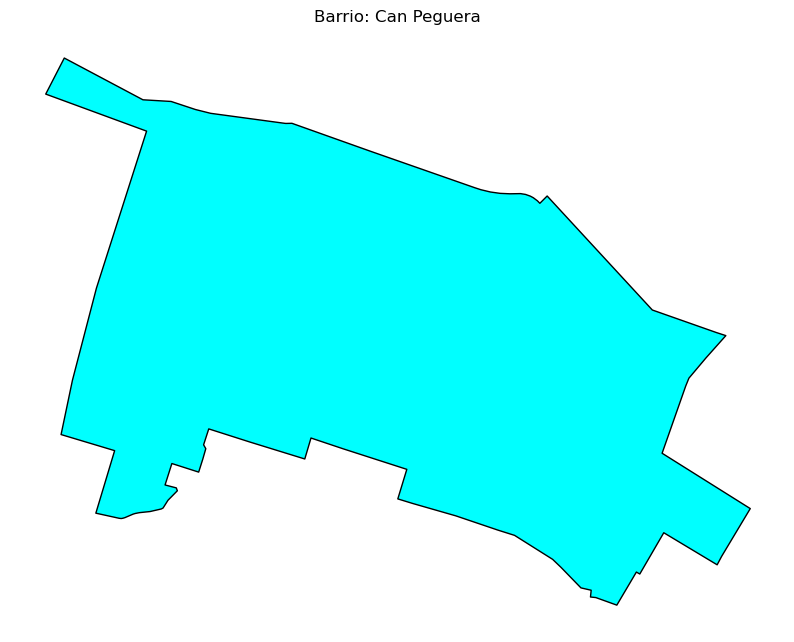

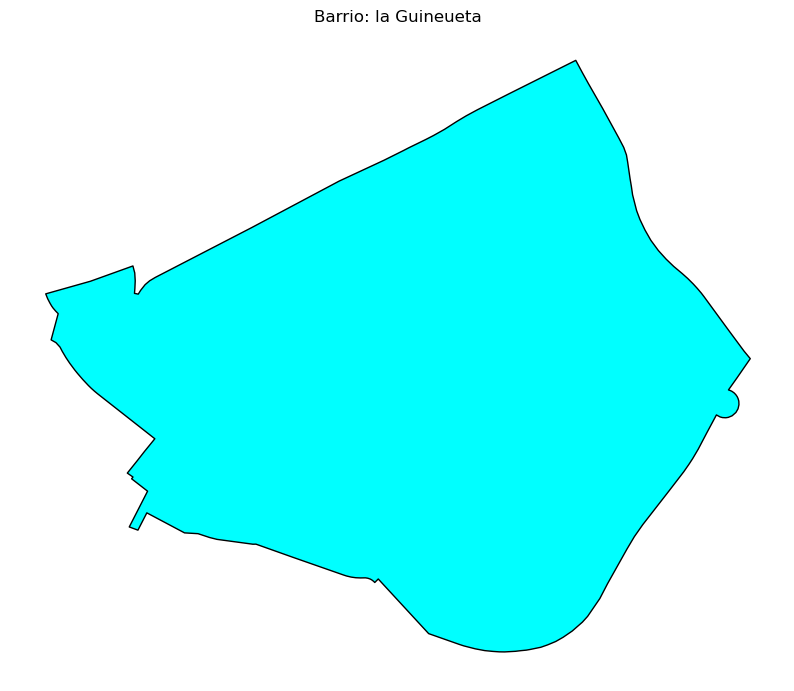

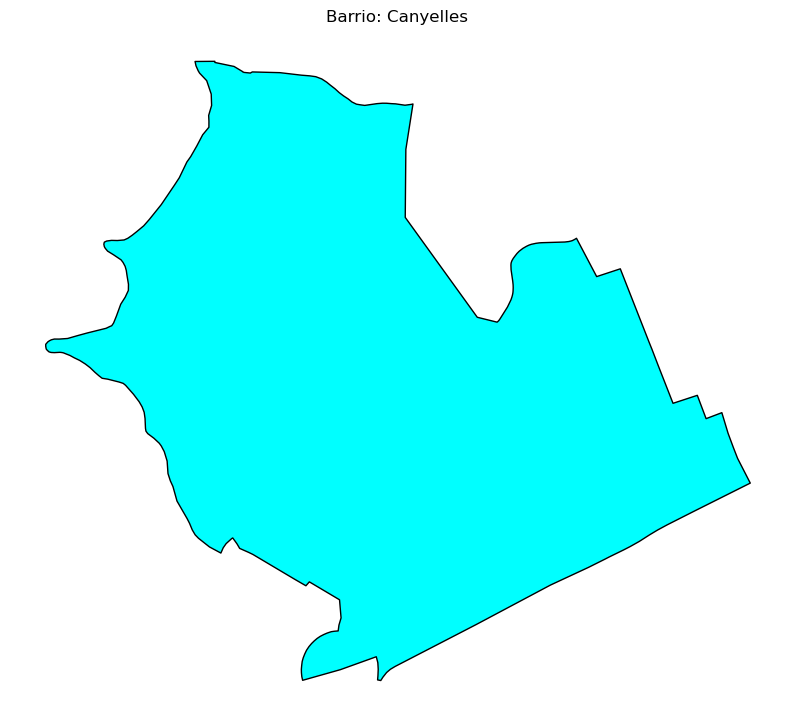

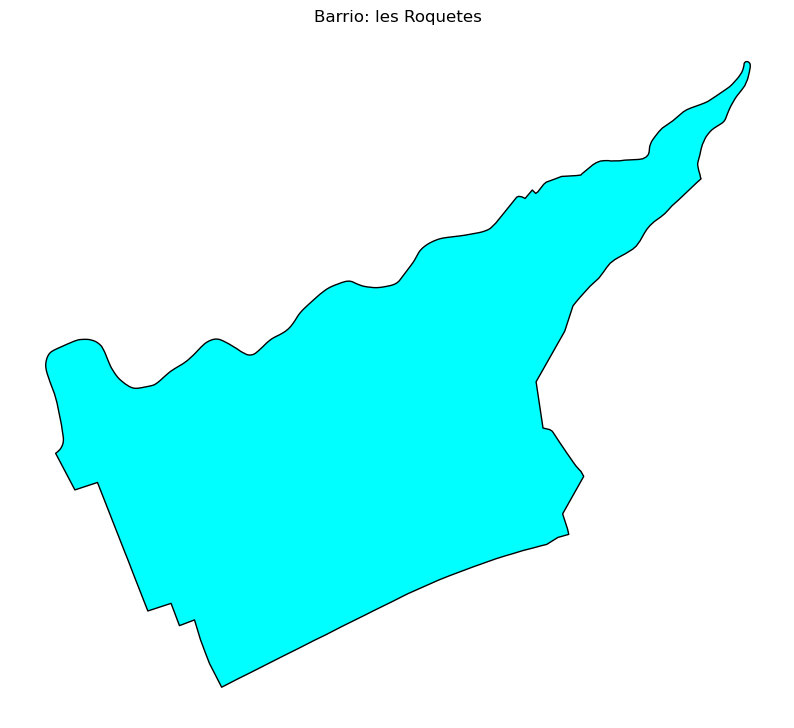

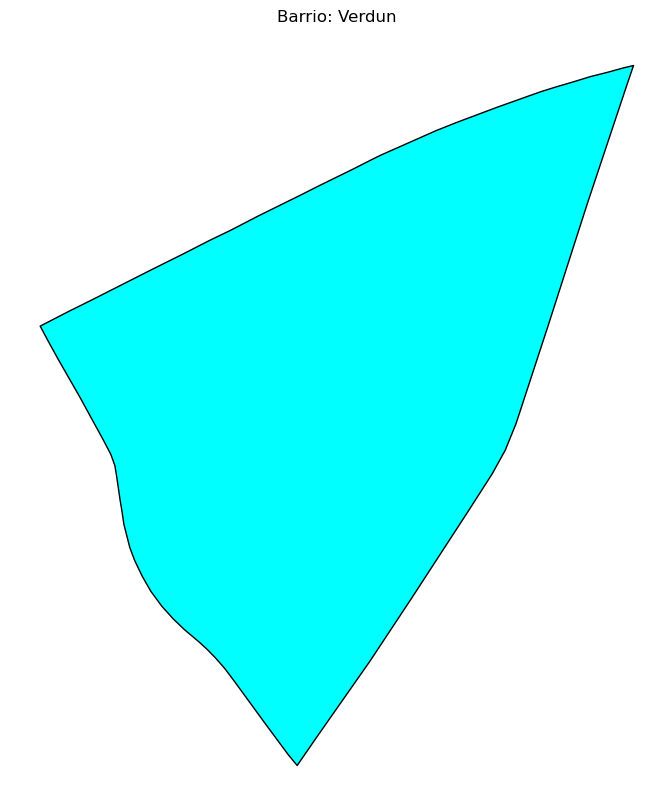

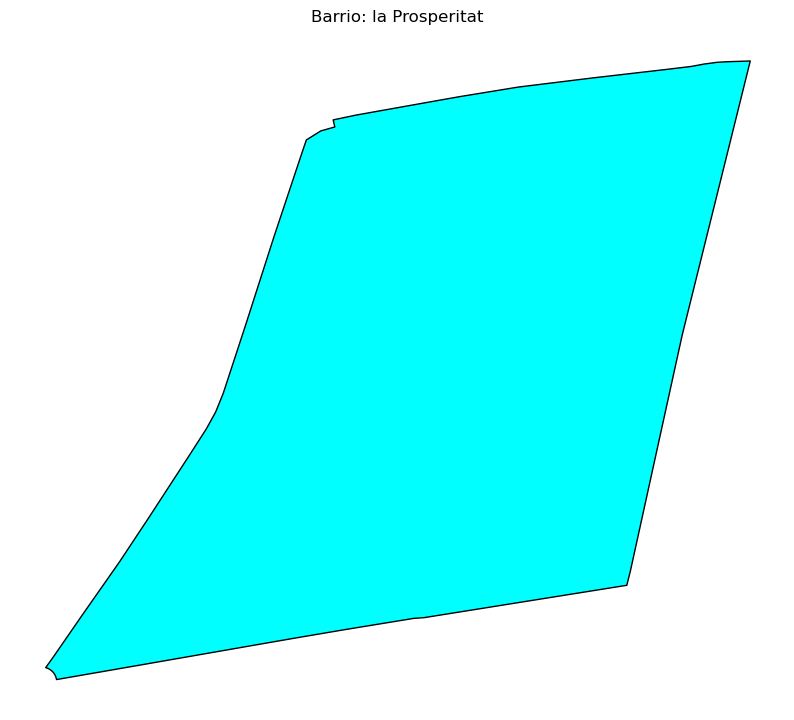

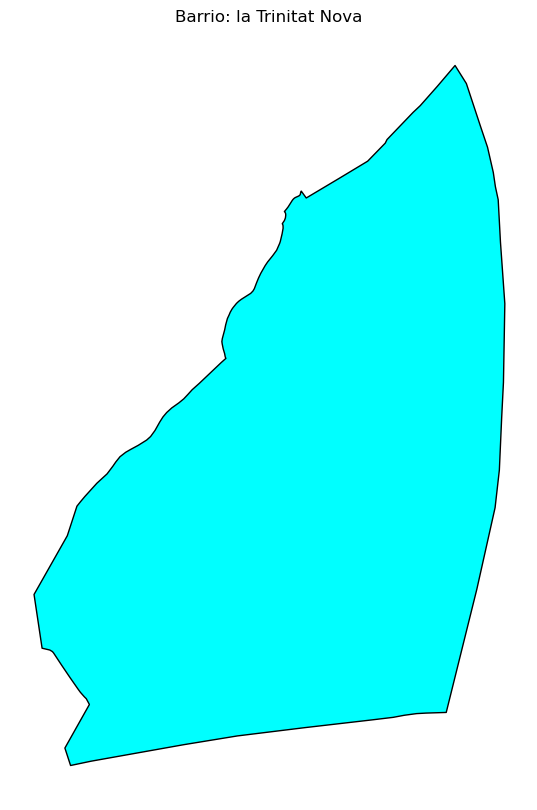

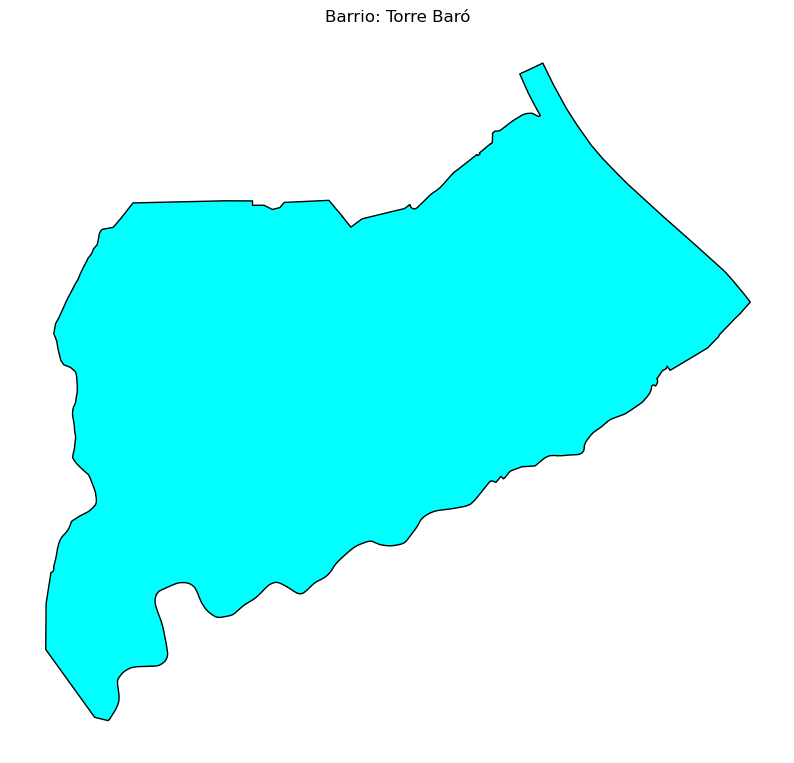

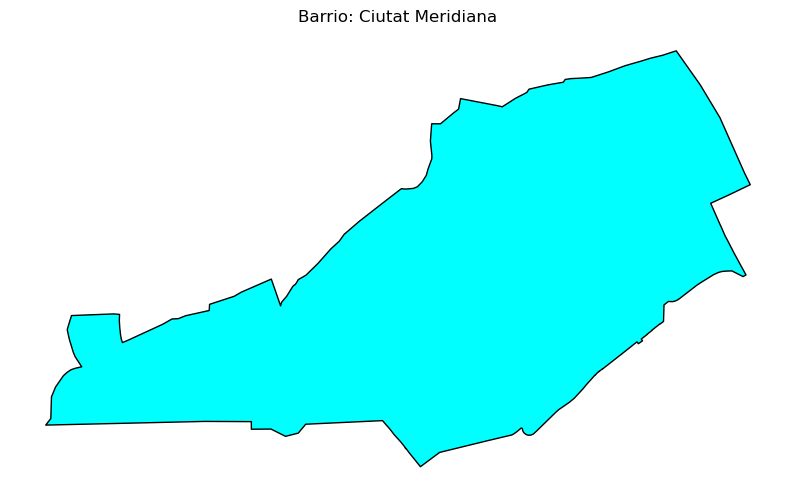

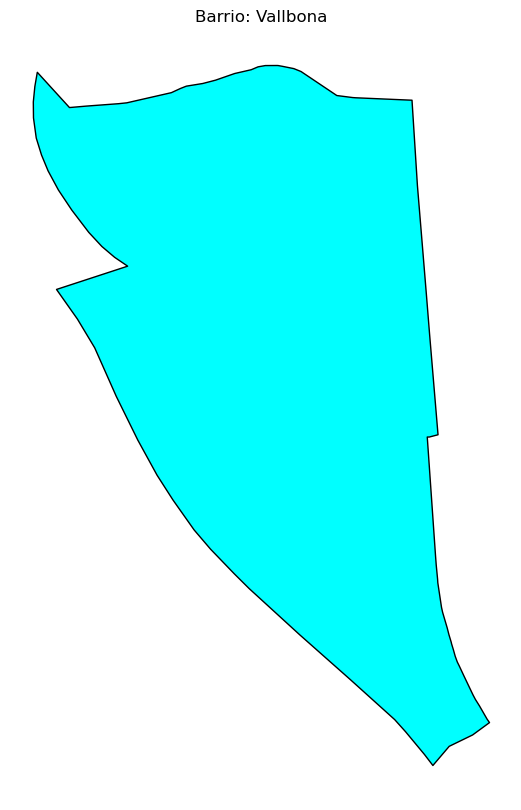

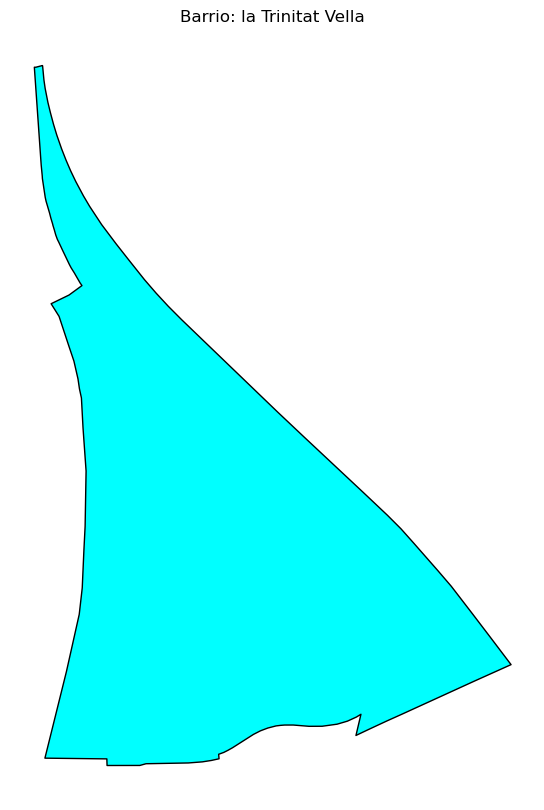

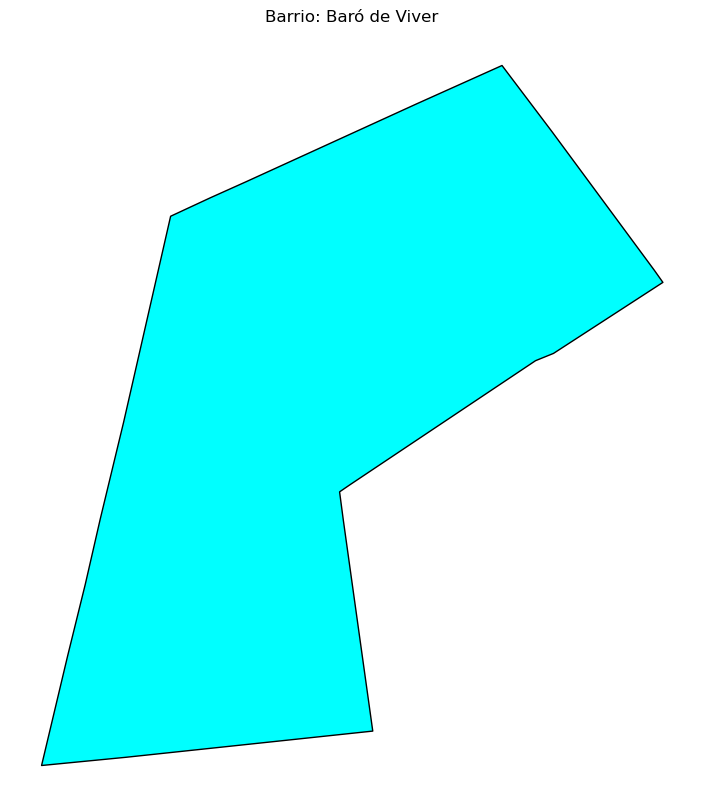

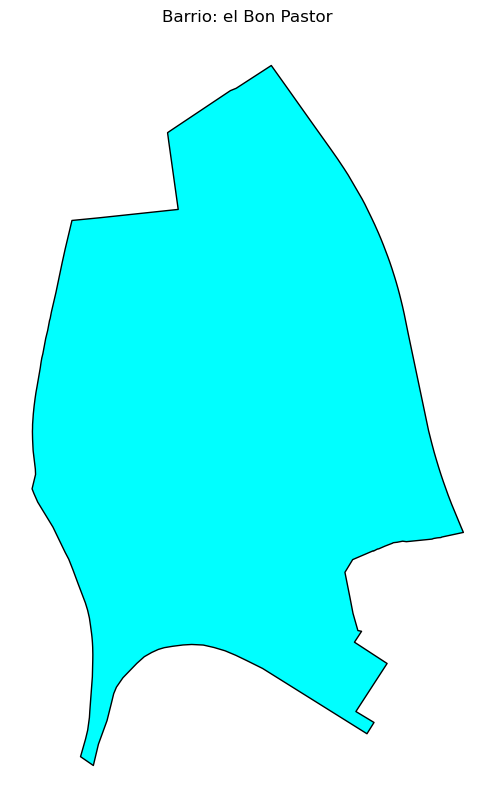

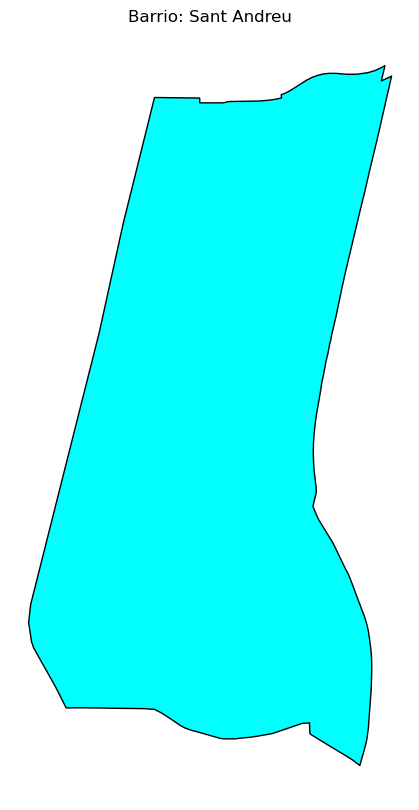

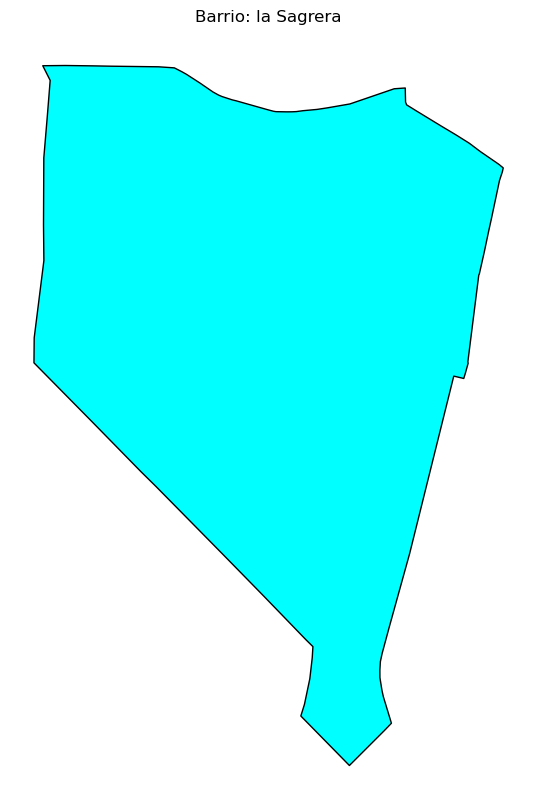

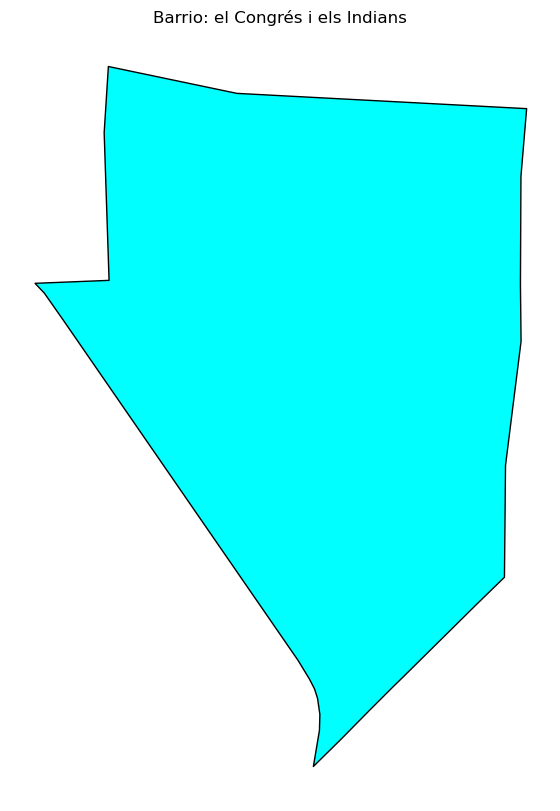

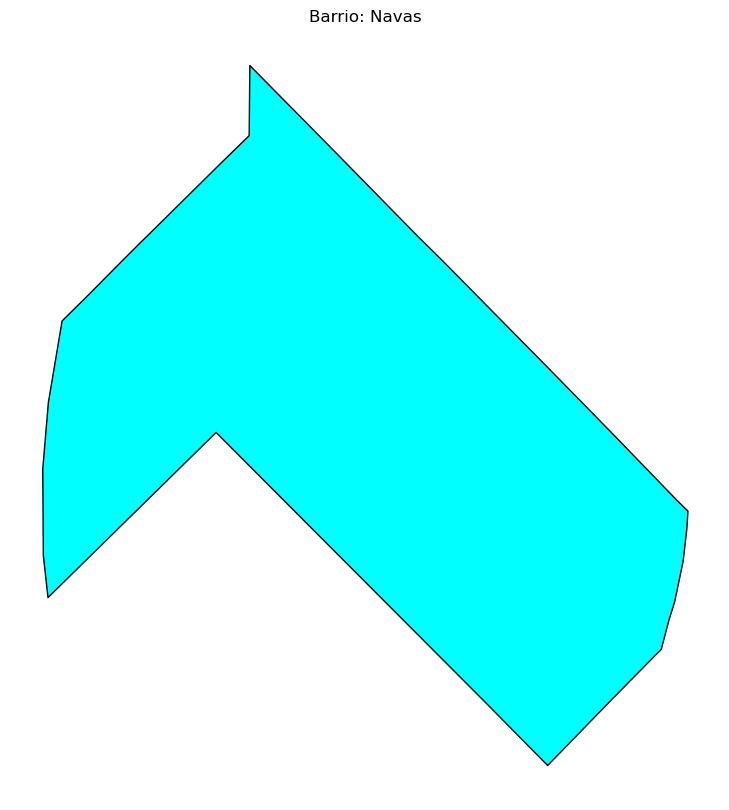

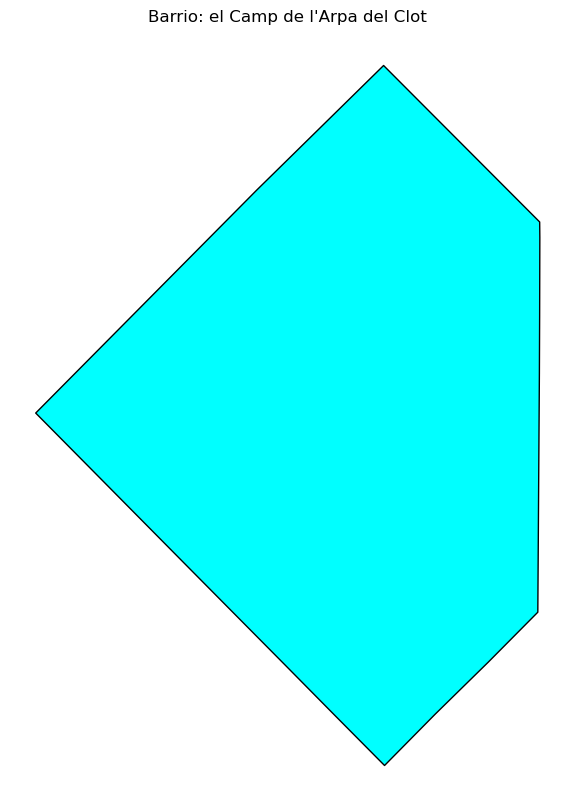

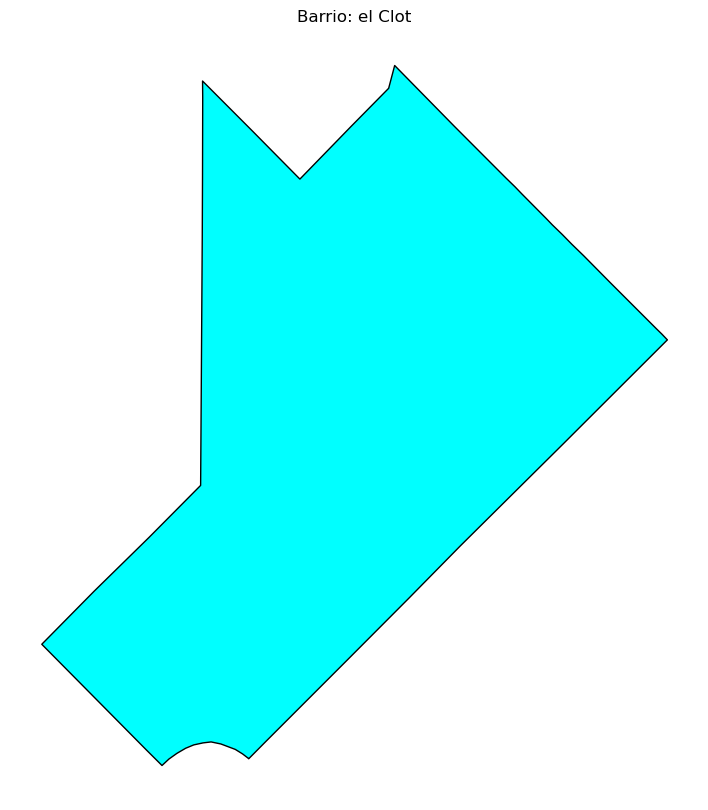

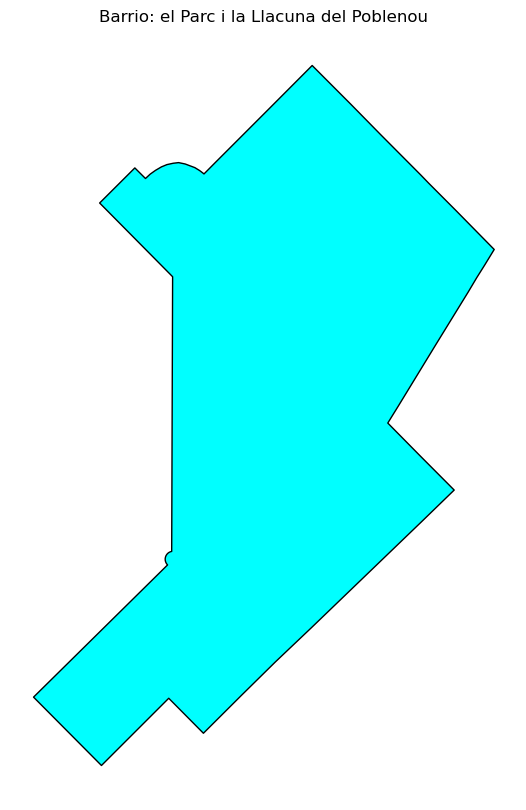

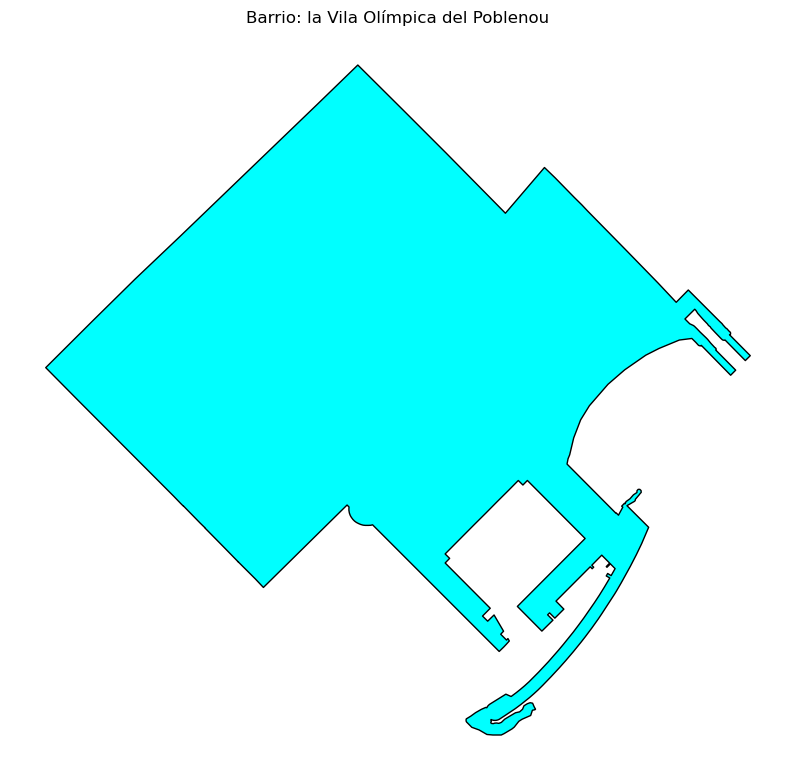

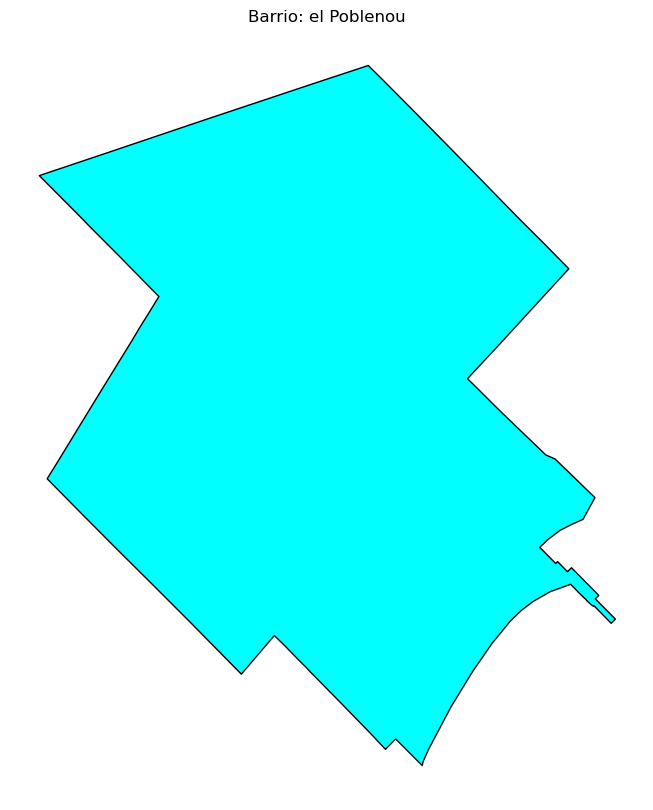

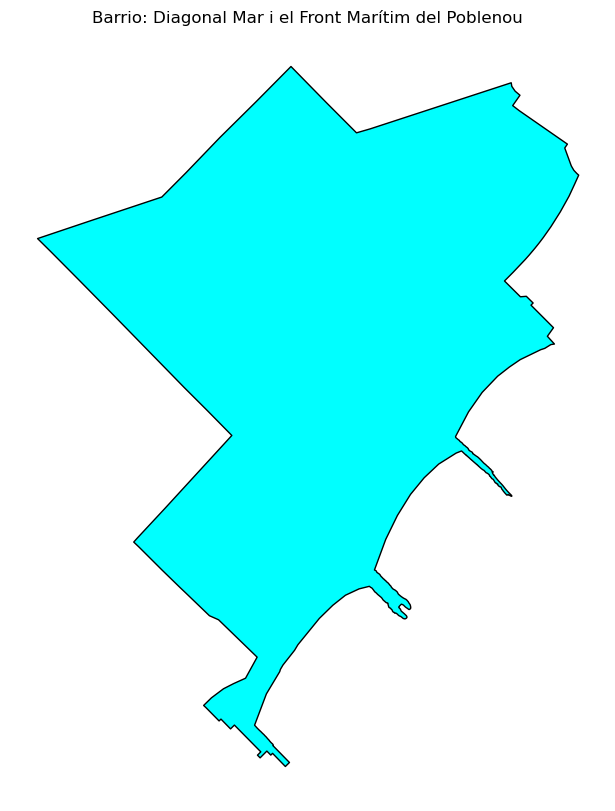

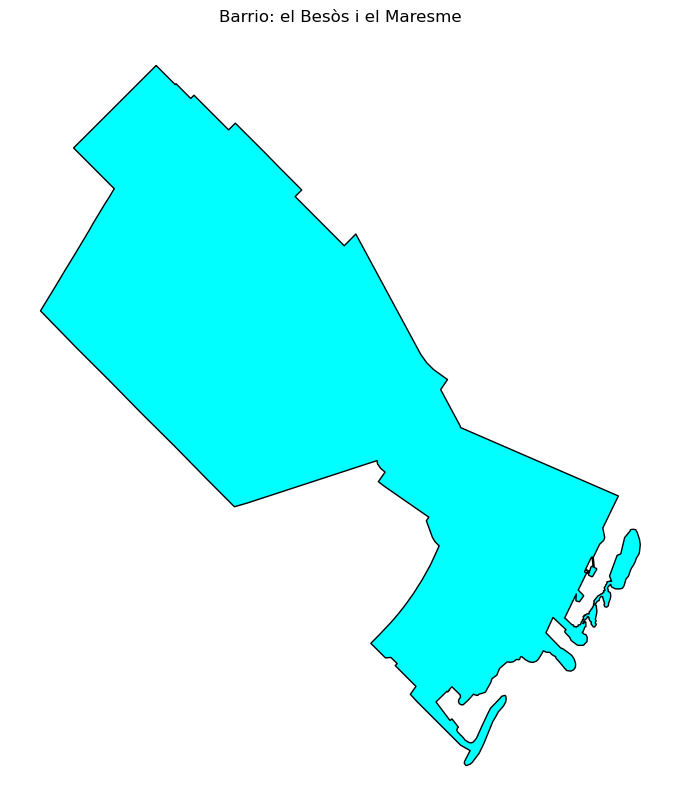

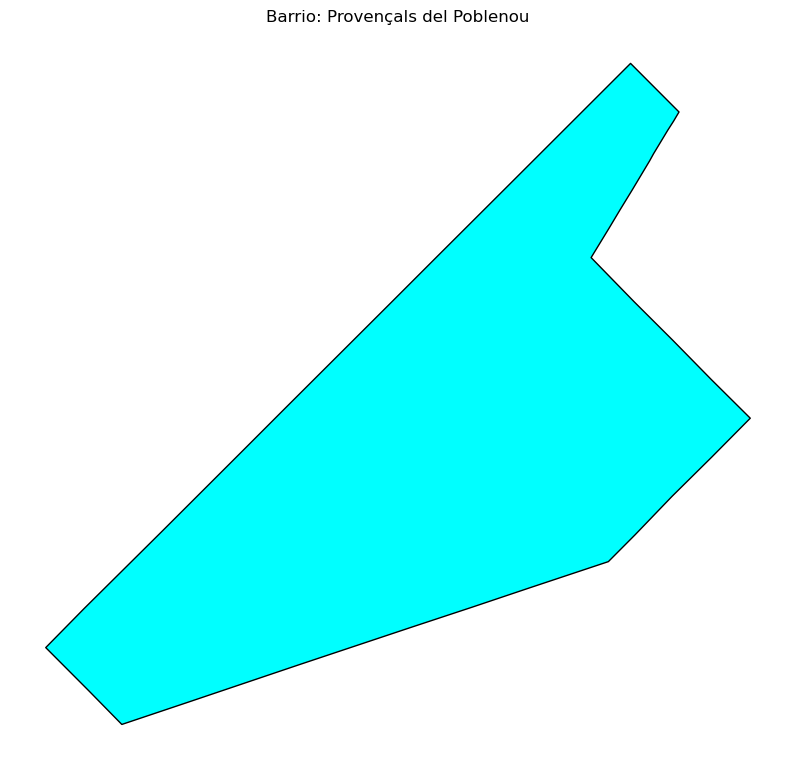

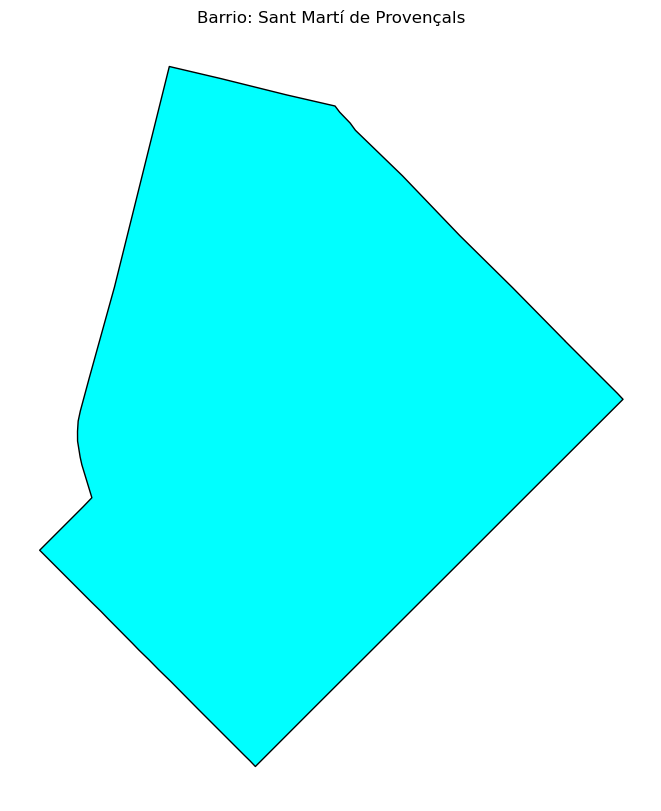

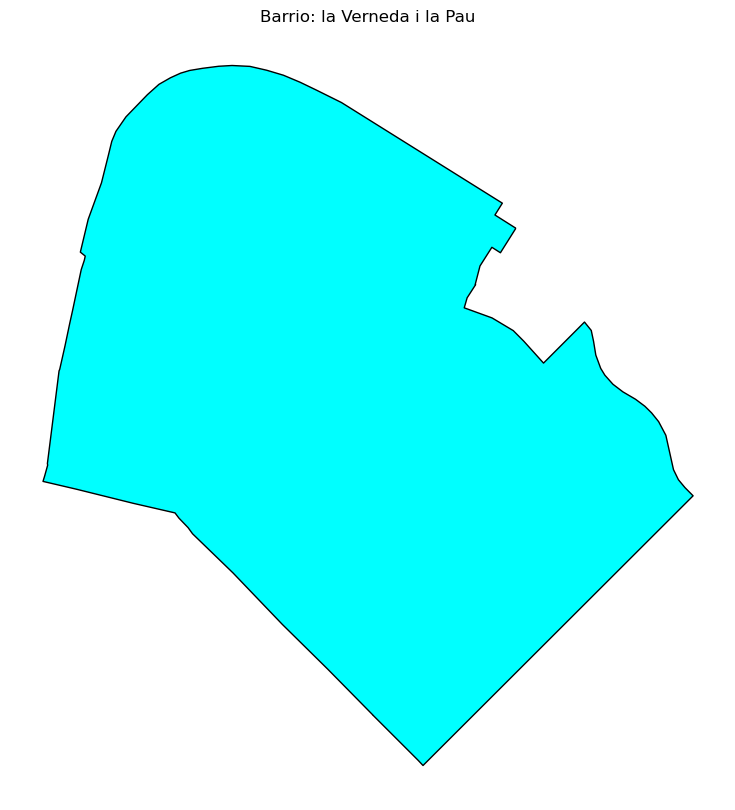

In [2]:
# Lectura del fichero CSV:
df = pd.read_csv('../Data/BarcelonaCiutat_Barris.csv')

# Conversión de las geometrías WKT a objetos de geometría para su procesamiento:
df['geometry_wgs84'] = df['geometria_wgs84'].apply(wkt.loads)

# Creación de un GeoDataFrame:
gdf_wgs84 = gpd.GeoDataFrame(df, geometry='geometry_wgs84', crs="EPSG:4326")  # WGS84

# Iteración sobre cada barrio y creación de una figura para cada uno:
for i, row in gdf_wgs84.iterrows():
    nom_barrio = row['nom_barri']
    geometry = row['geometry_wgs84']

    # Creación de un GeoDataFrame para el barrio actual:
    gdf_barrio = gpd.GeoDataFrame([row], geometry='geometry_wgs84', crs="EPSG:4326")

    # Creación de la figura y el eje:
    fig, ax = plt.subplots(figsize=(10, 10))

    # Dibujo de la geometría del barrio:
    gdf_barrio.plot(ax=ax, color='cyan', edgecolor='black')
    ax.set_title(f'Barrio: {nom_barrio}')

    # Ocultación de los ejes:
    ax.set_axis_off()

    # Visualización de cada mapa:
    plt.show()


### Visualización del mapa de Barcelona con sus distritos:

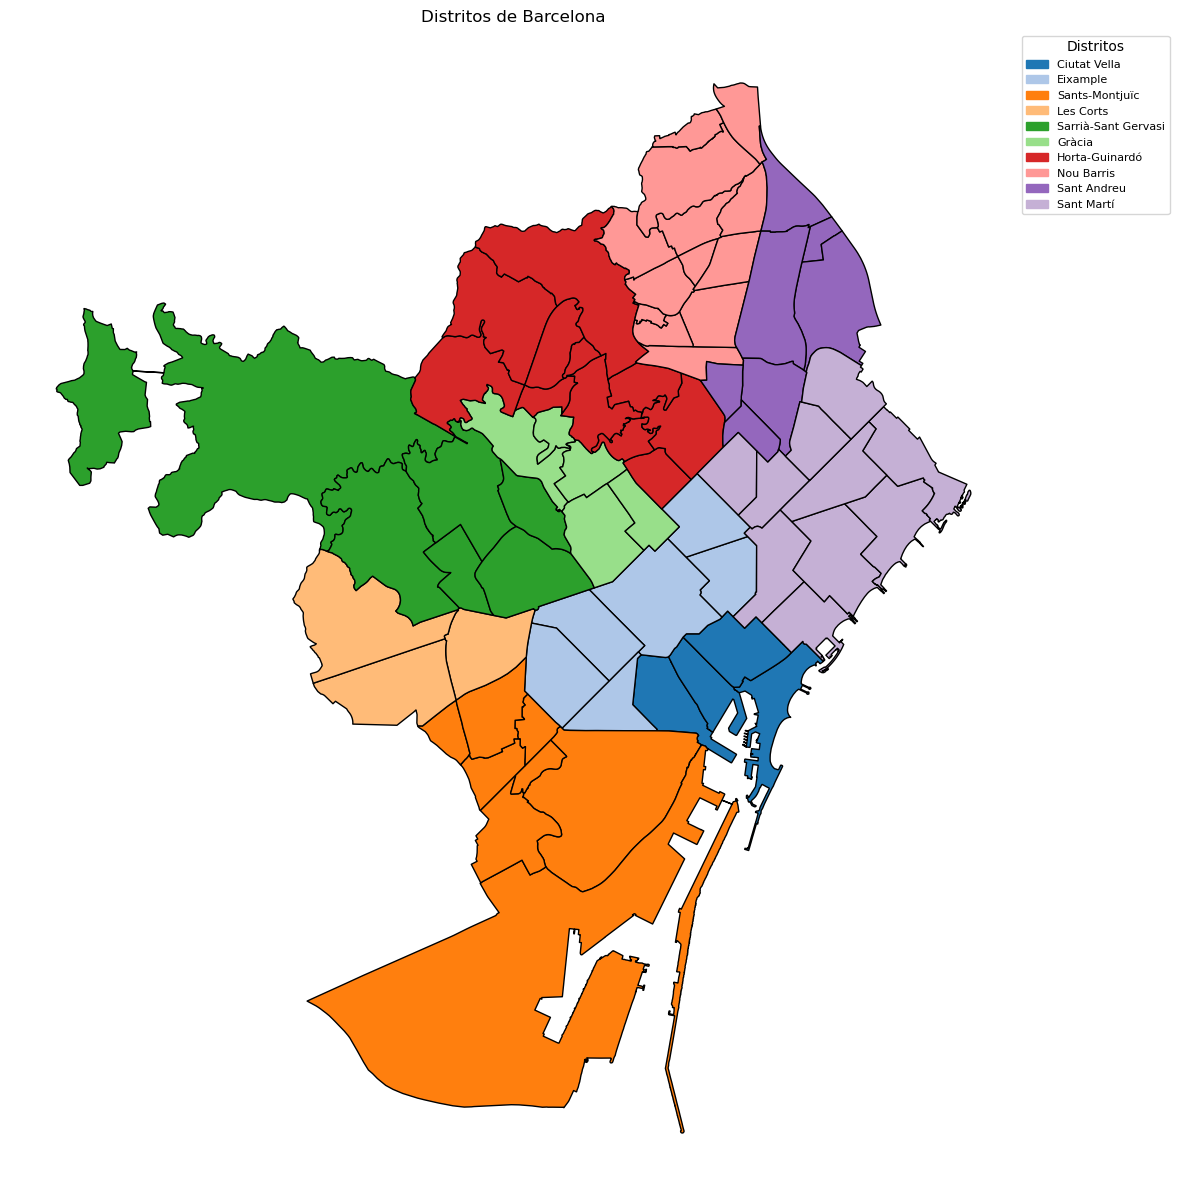

In [3]:
# Lectura del fichero CSV:
df = pd.read_csv('../Data/BarcelonaCiutat_Barris.csv')

# Conversión de las geometrías WKT a objetos de geometría:
df['geometry_wgs84'] = df['geometria_wgs84'].apply(wkt.loads)

# Creación de GeoDataFrame:
gdf_wgs84 = gpd.GeoDataFrame(df, geometry='geometry_wgs84', crs="EPSG:4326")  # WGS84

# Creación de la figura y el eje:
fig, ax = plt.subplots(figsize=(15, 15))

# Lista de distritos únicos para agrupar los barrios:
nom_distrito_unique = df['nom_districte'].unique()

# Paleta de colores basada en  de distrito únicos:
palette = sns.color_palette("tab20", len(nom_distrito_unique))

# Lista para la leyenda:
patches = []

# Visualización de cada barrio con un color diferente en función de su distrito:
for i, row in gdf_wgs84.iterrows():
    nom_distrito = row['nom_districte']
    cod_distrito = row['codi_districte']
    geometry = row['geometry_wgs84']
    color = palette[cod_distrito - 1]  # Se resta 1 para ajustar el índice de la paleta al distrito.

    # Se añade el barrio al gráfico:
    gdf_barrio = gpd.GeoDataFrame([row], geometry='geometry_wgs84', crs="EPSG:4326")
    gdf_barrio.plot(ax=ax, color=color, edgecolor='black')

 # Ocultación de los ejes:
ax.set_axis_off()

# Creación de la leyenda con el color del distrito:
patches = []
for distrito, color in zip(nom_distrito_unique, palette):
    patch = plt.Rectangle((0, 0), 1, 1, color=color, label=distrito)
    patches.append(patch)

# Título del gráfico:
plt.title("Distritos de Barcelona")

# Visualización de la leyenda:
plt.legend(handles=patches, loc='upper left', bbox_to_anchor=(1, 1), fontsize=8, title='Distritos')

# Visualización del mapa completo:
plt.show()


### Visualización del mapa de Barcelona con sus barrios:

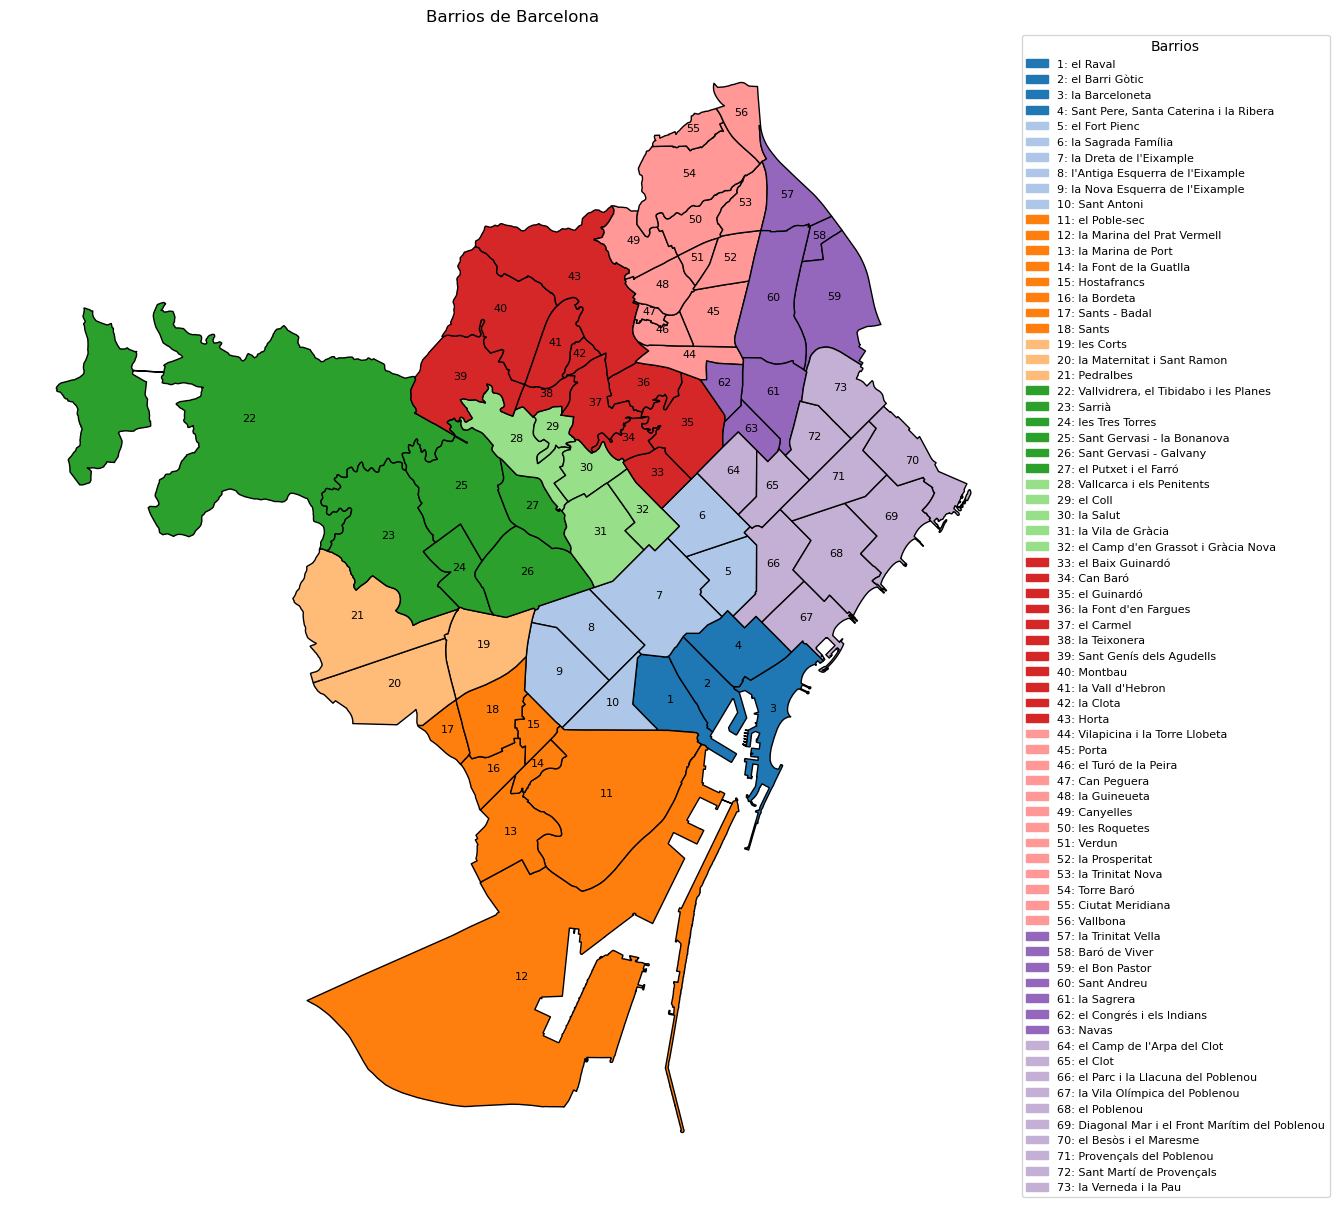

In [4]:
# Lectura del fichero CSV:
df = pd.read_csv('../Data/BarcelonaCiutat_Barris.csv')

# Conversión de las geometrías WKT a objetos de geometría:
df['geometry_wgs84'] = df['geometria_wgs84'].apply(wkt.loads)

# Creación de GeoDataFrame:
gdf_wgs84 = gpd.GeoDataFrame(df, geometry='geometry_wgs84', crs="EPSG:4326")  # WGS84

# Creación de la figura y el eje:
fig, ax = plt.subplots(figsize=(15, 15))

# Lista de códigos de distrito únicos para agrupar los barrios:
codigo_distrito_unique = df['codi_districte'].unique()

# Paleta de colores basada en el número de códigos de distrito únicos:
palette = sns.color_palette("tab20", len(codigo_distrito_unique))

# Lista para la leyenda:
patches = []

# Visualización de cada barrio con un color diferente en función de su distrito:
for i, row in gdf_wgs84.iterrows():
    nom_barrio = row['nom_barri']
    cod_barrio = row['codi_barri']
    cod_distrito = row['codi_districte']
    geometry = row['geometry_wgs84']
    color = palette[cod_distrito - 1]  # Se resta 1 para ajustar el índice de la paleta al código de distrito.

    # Se añade el barrio al gráfico:
    gdf_barrio = gpd.GeoDataFrame([row], geometry='geometry_wgs84', crs="EPSG:4326")
    gdf_barrio.plot(ax=ax, color=color, edgecolor='black')

    # Se añade el número del barrio en el centroide para identificarlo:
    x, y = geometry.centroid.x, geometry.centroid.y
    ax.text(x, y, cod_barrio, fontsize=8, ha='center')

    # Se añade el parche en la leyenda para visualiar la correspondencia num_barrio- nom_barrio:
    patch = mpatches.Patch(color=color, label=f'{cod_barrio}: {nom_barrio}')
    patches.append(patch)

 # Ocultación de los ejes:
ax.set_axis_off()

# Título del gráfico:
plt.title("Barrios de Barcelona")

# Visualización de la leyenda:
plt.legend(handles=patches, loc='upper left', bbox_to_anchor=(1, 1), fontsize=8, title='Barrios')

# Visualización del mapa completo:
plt.show()


### Comparativa de los barrios en función de sus equipaciones:

In [5]:
# Lectura del fichero que contiene toda la información:
df = pd.read_csv('../04-Dataset Finales/dataset_equipamentos_BCN.csv', sep=';')
coordenadas = pd.read_csv('../Data/BarcelonaCiutat_Barris.csv')

# Conversión de las geometrías WKT a objetos de geometría:
coordenadas['geometry_wgs84'] = coordenadas['geometria_wgs84'].apply(wkt.loads)

# Creación de GeoDataFrame:
gdf_wgs84 = gpd.GeoDataFrame(coordenadas, geometry='geometry_wgs84', crs="EPSG:4326")
gdf_wgs84['centroide']  = gdf_wgs84['geometry_wgs84'].centroid
# Extraer latitud y longitud del centroide
gdf_wgs84['centroide_lat'] = gdf_wgs84['centroide'].y
gdf_wgs84['centroide_lon'] = gdf_wgs84['centroide'].x

gdf_wgs84 = gdf_wgs84.rename(columns={'codi_districte':'cod_distrito','nom_districte':'nom_distrito','codi_barri':'cod_barrio', 'nom_barri':'nom_barrio'})
# Se va a hacer la unión para enriquecer las equipaciones con las coordenadas y poder pintar los mapas:
dataframes=[df, gdf_wgs84]

# Concatenación de todos los DataFrames:
df_concatenado = pd.concat(dataframes, ignore_index=True)

# Unión por distrito y barrio:
keys = df_concatenado[['cod_barrio', 'cod_distrito']].drop_duplicates()
resultado = pd.merge(keys, df_concatenado, on=['cod_barrio', 'cod_distrito'], how='left')

# Agrupación en una única línea todos los KPIs por barrio con sus coordenadas:
resultado = resultado.groupby(['cod_barrio', 'cod_distrito', 'nom_barrio', 'nom_distrito']).first().reset_index()
resultado = resultado.drop(columns=['geometria_etrs89','geometria_wgs84','geometry_wgs84','centroide'])
resultado.to_csv('../04-Dataset Finales/dataset_equipamentos_BCN_mapas.csv', encoding='UTF-8', index=False, sep=';', decimal='.')




C:\Users\patry\AppData\Local\Temp\ipykernel_21692\4059618705.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_wgs84['centroide']  = gdf_wgs84['geometry_wgs84'].centroid
